In this work, I considered the ten most eaten crops in the world including cocoa, coffee and tea for African countries. 

I collected the yield, insecticides, pesticides data from
[The Food and Agriculture Organization of the United Nations](http://www.fao.org/faostat/en/#home).

The temperature and rainfall data is from [The World Bank Open Data](https://data.worldbank.org/)










# Part One: 
## Explore and Cleaning Data


https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

### Crops Yield Data:


In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties

# This will tell matplotlib that we want to include the plots on our notebook, rather than in a new window.
%matplotlib inline

# Here you can control the font for the plots.
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df_crops = pd.read_csv("data_use/Production_Crops_Livestock_E_All_Data.csv",encoding='latin-1')
df_crops.shape

(78514, 125)

In [3]:
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14676.0,NaN,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16521.0,Fc,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,24246.0,NaN,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,25000.0,F,25787.0,Im,28398.0,Im,26725.0,Im,27562.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7200.0,Fc,6982.0,Fc,6863.0,Fc,6898.0,Fc,6903.0,Fc


In [4]:
#https://stackoverflow.com/questions/39741429/pandas-replace-a-character-in-all-column-names
#removing the Y from the year

df_crops.columns = df_crops.columns.str.replace('[Y,F]','', regex=True)
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,1961,1961,1962,...,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14676.0,NaN,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16521.0,Fc,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,24246.0,NaN,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,25000.0,F,25787.0,Im,28398.0,Im,26725.0,Im,27562.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7200.0,Fc,6982.0,Fc,6863.0,Fc,6898.0,Fc,6903.0,Fc


In [5]:
#https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows
# convert rows to columns using "Melt"
df_crops = pd.melt(df_crops, id_vars=["Area Code","Area",
                                 "Item Code","Item","Element Code",
                                 "Element","Unit"],
             var_name="Year",value_name="Value")
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,1961,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,1961,NaN
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,1961,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,1961,NaN
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,1961,NaN


In [6]:
## selecting specific name in a column
df_crops = df_crops[df_crops["Element"]=="Yield"]
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,1961,NaN
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,1961,NaN
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,1961,68018.0
10,2,Afghanistan,526,Apricots,5419,Yield,hg/ha,1961,66390.0
14,2,Afghanistan,44,Barley,5419,Yield,hg/ha,1961,10800.0


In [7]:
## selecting columns that will be use
df_crops =df_crops[ ['Area', 'Item', 'Year','Value']]
df_crops.head()

,Area,Item,Year,Value
1,Afghanistan,"Almonds, with shell",1961,NaN
4,Afghanistan,"Anise, badian, fennel, coriander",1961,NaN
7,Afghanistan,Apples,1961,68018.0
10,Afghanistan,Apricots,1961,66390.0
14,Afghanistan,Barley,1961,10800.0


In [8]:
#df_crops.Item.unique()

In [9]:


East_African = ["Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Kenya",
                "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique", "Reunion",
                "Rwanda", "Seychelles", "Somalia", "Tanzania", "Uganda", "Zambia", "Zimbabwe"]

crops =["Potatoes","Beans, dry",  "Coffee, green" ,"Tea"]

#crops = ["Cassava","Beans, dry","Maize","Wheat","Rice, paddy","Pulses, nes","Tea",
         #"Cloves","Bananas","Potatoes",  "Coffee, green" ]
         
        

In [10]:
df_crops = df_crops[df_crops.Area.isin(East_African) & df_crops.Item.isin(crops)
                   ]
df_crops.head()

,Area,Item,Year,Value
7853,Burundi,"Beans, dry",1961,10952.0
7874,Burundi,"Coffee, green",1961,7778.0
7967,Burundi,Potatoes,1961,37500.0
8001,Burundi,Tea,1961,NaN
12099,Comoros,"Coffee, green",1961,5000.0


In [11]:
df_crops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 7853 to 9246043
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    5782 non-null   object
 1   Item    5782 non-null   object
 2   Year    5782 non-null   object
 3   Value   4998 non-null   object
dtypes: object(4)
memory usage: 225.9+ KB


In [12]:
print(df_crops[df_crops['Value'].isnull()])

              Area           Item  Year Value
8001       Burundi            Tea  1961   NaN
12152      Comoros       Potatoes  1961   NaN
15864     Djibouti     Beans, dry  1961   NaN
17665      Eritrea     Beans, dry  1961   NaN
17758      Eritrea       Potatoes  1961   NaN
...            ...            ...   ...   ...
8906540  Mauritius  Coffee, green  2017   NaN
8985054  Mauritius  Coffee, green  2018   NaN
9063568  Mauritius  Coffee, green  2018   NaN
9142082  Mauritius  Coffee, green  2019   NaN
9220596  Mauritius  Coffee, green  2019   NaN

[784 rows x 4 columns]


In [13]:
df_crops['Value'] = pd.to_numeric(df_crops['Value'],errors='coerce')
#df_crops.info()

In [14]:
df_crops = df_crops.dropna(subset=['Value'])
print(df_crops[df_crops['Value'].isnull()])

Empty DataFrame
Columns: [Area, Item, Year, Value]
Index: []


In [15]:
# Change the datatype of "Year"
df_crops = df_crops.astype({'Year':int, 'Value':int})
df_crops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 7853 to 9167529
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    2499 non-null   object
 1   Item    2499 non-null   object
 2   Year    2499 non-null   int32 
 3   Value   2499 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 78.1+ KB


In [16]:
# Rename some columns
# the yield value is in hectogramme (100 grammes) per hectare (HG/HA)

df_crops = df_crops.rename(index=str, columns={"Area":"Country",
                                               "Value":"Yield",
                                               "Item":"Crop"})
    
#df_crops = df_crops.rename(index=str, columns={"Value":"yield"})
df_crops.head()

,Country,Crop,Year,Yield
7853,Burundi,"Beans, dry",1961,10952
7874,Burundi,"Coffee, green",1961,7778
7967,Burundi,Potatoes,1961,37500
12099,Comoros,"Coffee, green",1961,5000
29096,Kenya,"Beans, dry",1961,4783


In [17]:
df_crops.describe()

,Year,Yield
count,2499.000000,2499.000000
mean,1991.969188,33354.609844
std,16.821302,47912.451780
min,1961.000000,477.000000
25%,1978.000000,6040.000000
50%,1993.000000,9688.000000
75%,2006.000000,37522.500000
max,2019.000000,316235.000000


## Pesticides Data:


In [18]:
df_pest = pd.read_csv("data_use/pesticides_use.csv")
df_pest.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RP,Pesticides Use,4,Algeria,5157,Agricultural Use,1357,Pesticides (total),1990,1990,tonnes,5743,A,"Aggregate, may include official, semi-official..."
1,RP,Pesticides Use,4,Algeria,5157,Agricultural Use,1357,Pesticides (total),1991,1991,tonnes,7094,A,"Aggregate, may include official, semi-official..."
2,RP,Pesticides Use,4,Algeria,5157,Agricultural Use,1357,Pesticides (total),1992,1992,tonnes,3876,A,"Aggregate, may include official, semi-official..."
3,RP,Pesticides Use,4,Algeria,5157,Agricultural Use,1357,Pesticides (total),1993,1993,tonnes,3710,A,"Aggregate, may include official, semi-official..."
4,RP,Pesticides Use,4,Algeria,5157,Agricultural Use,1357,Pesticides (total),1994,1994,tonnes,4059,A,"Aggregate, may include official, semi-official..."


In [19]:
df_pest = df_pest[['Area', 'Year','Value']]
# the pesticides value is in tonnes

df_pest = df_pest.rename(index=str, columns={"Area":"Country",
                                               "Value":"Pesticides"})
#df_pest = df_pest.rename(index=str, columns={"Value":"pest_value"})
df_pest

,Country,Year,Pesticides
0,Algeria,1990,5743
1,Algeria,1991,7094
2,Algeria,1992,3876
3,Algeria,1993,3710
4,Algeria,1994,4059
...,...,...,...
1205,Zimbabwe,2014,2185
1206,Zimbabwe,2015,2185
1207,Zimbabwe,2016,2185
1208,Zimbabwe,2017,2185


In [20]:
## merge yield data with pesticides data

df_crops = pd.merge(df_crops,df_pest, on=['Year','Country'])
#df_crops = pd.merge(df_crops,df_pest, on=['Year','Area'])
df_crops.head()

,Country,Crop,Year,Yield,Pesticides
0,Burundi,"Beans, dry",1990,13184,92
1,Burundi,"Coffee, green",1990,7742,92
2,Burundi,Potatoes,1990,34836,92
3,Burundi,Tea,1990,7742,92
4,Comoros,"Coffee, green",1990,1475,1


## Emission Data

In [21]:
#df_emm = pd.read_csv("data_use/emmision.csv")
df_emm = pd.read_csv("data_use/FAOSTAT_data_8-10-2021_em.csv")
df_emm.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1709,Agricultural Soils,1961,1961,3050,FAO TIER 1,kilotonnes,9.9930,Fc,Calculated data,NaN
1,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1709,Agricultural Soils,1962,1962,3050,FAO TIER 1,kilotonnes,9.8835,Fc,Calculated data,NaN
2,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1709,Agricultural Soils,1963,1963,3050,FAO TIER 1,kilotonnes,10.0523,Fc,Calculated data,NaN
3,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1709,Agricultural Soils,1964,1964,3050,FAO TIER 1,kilotonnes,10.2638,Fc,Calculated data,NaN
4,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1709,Agricultural Soils,1965,1965,3050,FAO TIER 1,kilotonnes,10.5070,Fc,Calculated data,NaN


In [22]:
#To remove N2O value in the data
#value_list = ['Emissions (N2O)']
#not_need = ~df_emm.Element.isin(value_list)
#df_emm = df_emm[not_need]
#df_emm.head()

In [23]:

# the value of methane emissions is in kilotonnes

df_emm = df_emm[['Area', 'Year', 'Value']]

df_emm = df_emm.rename(index=str,columns={"Value":"N2O",
                                          "Area":"Country"})
df_emm

,Country,Year,N2O
0,Afghanistan,1961,9.9930
1,Afghanistan,1962,9.8835
2,Afghanistan,1963,10.0523
3,Afghanistan,1964,10.2638
4,Afghanistan,1965,10.5070
...,...,...,...
11471,Zimbabwe,2015,11.8965
11472,Zimbabwe,2016,12.1768
11473,Zimbabwe,2017,12.4810
11474,Zimbabwe,2018,12.6429


In [24]:
## merge yield data with emmission data
df_crops = pd.merge(df_crops,df_emm, on=['Country','Year'])
df_crops

,Country,Crop,Year,Yield,Pesticides,N2O
0,Burundi,"Beans, dry",1990,13184,92,2.9406
1,Burundi,"Coffee, green",1990,7742,92,2.9406
2,Burundi,Potatoes,1990,34836,92,2.9406
3,Burundi,Tea,1990,7742,92,2.9406
4,Comoros,"Coffee, green",1990,1475,1,0.1299
...,...,...,...,...,...,...
1299,Zambia,Tea,2018,14153,1670,20.4572
1300,Zimbabwe,"Beans, dry",2018,7941,2185,12.6429
1301,Zimbabwe,"Coffee, green",2018,626,2185,12.6429
1302,Zimbabwe,Potatoes,2018,41551,2185,12.6429


## Climate Data

#### Rainfall data

In [25]:
df_rain = pd.read_csv("data_use/rainfall.csv", error_bad_lines=False)
df_rain.head()

b'Skipping line 10082: expected 5 fields, saw 6\nSkipping line 10083: expected 5 fields, saw 6\nSkipping line 10084: expected 5 fields, saw 6\nSkipping line 10085: expected 5 fields, saw 6\nSkipping line 10086: expected 5 fields, saw 6\nSkipping line 10087: expected 5 fields, saw 6\nSkipping line 10088: expected 5 fields, saw 6\nSkipping line 10089: expected 5 fields, saw 6\nSkipping line 10090: expected 5 fields, saw 6\nSkipping line 10091: expected 5 fields, saw 6\nSkipping line 10092: expected 5 fields, saw 6\nSkipping line 10093: expected 5 fields, saw 6\nSkipping line 10094: expected 5 fields, saw 6\nSkipping line 10095: expected 5 fields, saw 6\nSkipping line 10096: expected 5 fields, saw 6\nSkipping line 10097: expected 5 fields, saw 6\nSkipping line 10098: expected 5 fields, saw 6\nSkipping line 10099: expected 5 fields, saw 6\nSkipping line 10100: expected 5 fields, saw 6\nSkipping line 10101: expected 5 fields, saw 6\nSkipping line 10102: expected 5 fields, saw 6\nSkipping li

b'Skipping line 246242: expected 5 fields, saw 6\nSkipping line 246243: expected 5 fields, saw 6\nSkipping line 246244: expected 5 fields, saw 6\nSkipping line 246245: expected 5 fields, saw 6\nSkipping line 246246: expected 5 fields, saw 6\nSkipping line 246247: expected 5 fields, saw 6\nSkipping line 246248: expected 5 fields, saw 6\nSkipping line 246249: expected 5 fields, saw 6\nSkipping line 246250: expected 5 fields, saw 6\nSkipping line 246251: expected 5 fields, saw 6\nSkipping line 246252: expected 5 fields, saw 6\nSkipping line 246253: expected 5 fields, saw 6\nSkipping line 246254: expected 5 fields, saw 6\nSkipping line 246255: expected 5 fields, saw 6\nSkipping line 246256: expected 5 fields, saw 6\nSkipping line 246257: expected 5 fields, saw 6\nSkipping line 246258: expected 5 fields, saw 6\nSkipping line 246259: expected 5 fields, saw 6\nSkipping line 246260: expected 5 fields, saw 6\nSkipping line 246261: expected 5 fields, saw 6\nSkipping line 246262: expected 5 field

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,47.3,1901,Jan Average,Afghanistan,AFG
1,30.4,1901,Feb Average,Afghanistan,AFG
2,51.6,1901,Mar Average,Afghanistan,AFG
3,34.2,1901,Apr Average,Afghanistan,AFG
4,44.0,1901,May Average,Afghanistan,AFG


In [26]:
df_rain.columns

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [27]:
df_rain.columns = df_rain.columns.str.lstrip()
df_rain.columns

Index(['Rainfall - (MM)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')

In [28]:
#Reordering columns
til = list(df_rain.columns)
til[0],til[3] = til[3],til[0]
df_rain = df_rain[til]

In [29]:
## Droping some columns
df_rain = df_rain.drop('ISO3', axis=1)

## renaming some columns
## the value for rainfall is in milimeters
df_rain = df_rain.rename(columns={'Rainfall - (MM)':'Avg_rain'})

## Removing the average from the month column
df_rain['Statistics'] = df_rain['Statistics'].replace('Average','',
                                                       regex=True)
df_rain


,Country,Year,Statistics,Avg_rain
0,Afghanistan,1901,Jan,47.3
1,Afghanistan,1901,Feb,30.4
2,Afghanistan,1901,Mar,51.6
3,Afghanistan,1901,Apr,34.2
4,Afghanistan,1901,May,44.0
...,...,...,...,...
272155,Zimbabwe,2020,Aug,1.1
272156,Zimbabwe,2020,Sep,7.7
272157,Zimbabwe,2020,Oct,23.5
272158,Zimbabwe,2020,Nov,74.1


#### Finding the annual rainfall of all the countries

In [30]:
### Using Groupby method to find the annual rainfall
df_rain = df_rain.groupby(['Country','Year'])
df_rain = df_rain.mean()
df_rain = df_rain.reset_index()

df_rain.head()

,Country,Year,Avg_rain
0,Afghanistan,1901,22.925000
1,Afghanistan,1902,21.408333
2,Afghanistan,1903,25.941667
3,Afghanistan,1904,25.141667
4,Afghanistan,1905,22.691667


## Temperature Data

In [31]:
df_temp = pd.read_csv("data_use/temperature.csv",
                      error_bad_lines=False)
df_temp

b'Skipping line 12962: expected 5 fields, saw 6\nSkipping line 12963: expected 5 fields, saw 6\nSkipping line 12964: expected 5 fields, saw 6\nSkipping line 12965: expected 5 fields, saw 6\nSkipping line 12966: expected 5 fields, saw 6\nSkipping line 12967: expected 5 fields, saw 6\nSkipping line 12968: expected 5 fields, saw 6\nSkipping line 12969: expected 5 fields, saw 6\nSkipping line 12970: expected 5 fields, saw 6\nSkipping line 12971: expected 5 fields, saw 6\nSkipping line 12972: expected 5 fields, saw 6\nSkipping line 12973: expected 5 fields, saw 6\nSkipping line 12974: expected 5 fields, saw 6\nSkipping line 12975: expected 5 fields, saw 6\nSkipping line 12976: expected 5 fields, saw 6\nSkipping line 12977: expected 5 fields, saw 6\nSkipping line 12978: expected 5 fields, saw 6\nSkipping line 12979: expected 5 fields, saw 6\nSkipping line 12980: expected 5 fields, saw 6\nSkipping line 12981: expected 5 fields, saw 6\nSkipping line 12982: expected 5 fields, saw 6\nSkipping li

b'Skipping line 246242: expected 5 fields, saw 6\nSkipping line 246243: expected 5 fields, saw 6\nSkipping line 246244: expected 5 fields, saw 6\nSkipping line 246245: expected 5 fields, saw 6\nSkipping line 246246: expected 5 fields, saw 6\nSkipping line 246247: expected 5 fields, saw 6\nSkipping line 246248: expected 5 fields, saw 6\nSkipping line 246249: expected 5 fields, saw 6\nSkipping line 246250: expected 5 fields, saw 6\nSkipping line 246251: expected 5 fields, saw 6\nSkipping line 246252: expected 5 fields, saw 6\nSkipping line 246253: expected 5 fields, saw 6\nSkipping line 246254: expected 5 fields, saw 6\nSkipping line 246255: expected 5 fields, saw 6\nSkipping line 246256: expected 5 fields, saw 6\nSkipping line 246257: expected 5 fields, saw 6\nSkipping line 246258: expected 5 fields, saw 6\nSkipping line 246259: expected 5 fields, saw 6\nSkipping line 246260: expected 5 fields, saw 6\nSkipping line 246261: expected 5 fields, saw 6\nSkipping line 246262: expected 5 field

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.2,1901,Jan Average,Afghanistan,AFG
1,2.3,1901,Feb Average,Afghanistan,AFG
2,9.0,1901,Mar Average,Afghanistan,AFG
3,13.4,1901,Apr Average,Afghanistan,AFG
4,18.0,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272155,18.7,2020,Aug Average,Zimbabwe,ZWE
272156,22.0,2020,Sep Average,Zimbabwe,ZWE
272157,24.3,2020,Oct Average,Zimbabwe,ZWE
272158,26.2,2020,Nov Average,Zimbabwe,ZWE


In [32]:
df_temp.columns = df_temp.columns.str.lstrip()

In [33]:
#Reordering columns
til = list(df_temp.columns)
til[0],til[3] = til[3],til[0]
df_temp = df_temp[til]

## Droping some columns
df_temp = df_temp.drop('ISO3', axis=1)

## Removing the average from the month column
df_temp['Statistics'] = df_temp['Statistics'].replace('Average','',
                                                       regex=True)

#### Renaming some columns
## the temperature values are in degree celsius
df_temp = df_temp.rename(columns={'Temperature - (Celsius)':'Avg_temp'})

### Using Groupby method to find the annual rainfall
df_temp = df_temp.groupby(['Country','Year'])
df_temp = df_temp.mean()
df_temp = df_temp.reset_index()

df_temp


,Country,Year,Avg_temp
0,Afghanistan,1901,12.991667
1,Afghanistan,1902,13.175000
2,Afghanistan,1903,12.008333
3,Afghanistan,1904,12.458333
4,Afghanistan,1905,12.233333
...,...,...,...
22675,Zimbabwe,2016,22.183333
22676,Zimbabwe,2017,21.641667
22677,Zimbabwe,2018,22.016667
22678,Zimbabwe,2019,22.300000


In [34]:
## Merge rain and temperature data
climate_data = pd.merge(df_rain,df_temp,on=['Country','Year'])
climate_data.head()

,Country,Year,Avg_rain,Avg_temp
0,Afghanistan,1901,22.925000,12.991667
1,Afghanistan,1902,21.408333,13.175000
2,Afghanistan,1903,25.941667,12.008333
3,Afghanistan,1904,25.141667,12.458333
4,Afghanistan,1905,22.691667,12.233333


In [35]:
#climate_data = climate_data.rename(columns={' Country':'Country',' Year':'Year'})
#climate_data.head()

In [36]:
### merge yield with the climate data
df_yield = pd.merge(df_crops,climate_data,on=['Country','Year'])
df_yield.head()

,Country,Crop,Year,Yield,Pesticides,N2O,Avg_rain,Avg_temp


In [37]:
set(df_crops).intersection(set(climate_data))

{'Country', 'Year'}

In [38]:
print(df_crops.Country.unique())
print(df_crops.Year.unique())

['Burundi' 'Comoros' 'Kenya' 'Madagascar' 'Malawi' 'Mauritius'
 'Mozambique' 'Rwanda' 'Seychelles' 'Uganda' 'Zambia' 'Zimbabwe' 'Eritrea'
 'Ethiopia']
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


In [39]:
print(climate_data.Country.unique())
print(climate_data.Year.unique())

[' Afghanistan' ' Albania' ' Algeria' ' Andorra' ' Antigua and Barbuda'
 ' Austria' ' Azerbaijan' ' Bahrain' ' Bangladesh' ' Barbados' ' Belarus'
 ' Belgium' ' Belize' ' Benin' ' Bhutan' ' Bolivia'
 ' Bosnia and Herzegovina' ' Botswana' ' Brazil' ' Brunei' ' Bulgaria'
 ' Burundi' ' Cambodia' ' Cameroon' ' Canada' ' Cape Verde'
 ' Central African Republic' ' Chile' ' China' ' Colombia' ' Comoros'
 ' Congo (Democratic Republic of the)' ' Congo (Republic of the)'
 ' Cook Islands' ' Costa Rica' " Cote d'Ivoire" ' Croatia' ' Cuba'
 ' Cyprus' ' Czech Republic' ' Denmark' ' Djibouti' ' Dominica'
 ' Dominican Republic' ' Ecuador' ' Egypt' ' El Salvador'
 ' Equatorial Guinea' ' Eritrea' ' Estonia' ' Eswatini' ' Ethiopia'
 ' Faroe Islands' ' Federated States of Micronesia' ' Fiji' ' Finland'
 ' France' ' Gabon' ' Georgia' ' Germany' ' Ghana' ' Greece' ' Greenland'
 ' Grenada' ' Guatemala' ' Guinea' ' Guinea-Bissau' ' Guyana' ' Haiti'
 ' Honduras' ' Hungary' ' Iceland' ' India' ' Indonesia' ' Ira

In [40]:
# Replace Côte d'Ivoire in yield data with Cote d'Ivoire

data1= { "Côte d'Ivoire": "Cote d'Ivoire"}
df_crops.Country = df_crops.Country.replace(data1)

""" 
Remove the space after the first inverted columns of values in the 
Country column of clim data
"""
climate_data.Country = [col.strip() for col in climate_data.Country]


In [41]:
### merge yield with the climate data AGAIN
df_yield = pd.merge(df_crops,climate_data,on=['Country','Year'])
df_yield

,Country,Crop,Year,Yield,Pesticides,N2O,Avg_rain,Avg_temp
0,Burundi,"Beans, dry",1990,13184,92,2.9406,103.075000,20.408333
1,Burundi,"Coffee, green",1990,7742,92,2.9406,103.075000,20.408333
2,Burundi,Potatoes,1990,34836,92,2.9406,103.075000,20.408333
3,Burundi,Tea,1990,7742,92,2.9406,103.075000,20.408333
4,Comoros,"Coffee, green",1990,1475,1,0.1299,154.250000,24.308333
...,...,...,...,...,...,...,...,...
1299,Zambia,Tea,2018,14153,1670,20.4572,84.666667,22.008333
1300,Zimbabwe,"Beans, dry",2018,7941,2185,12.6429,50.550000,22.016667
1301,Zimbabwe,"Coffee, green",2018,626,2185,12.6429,50.550000,22.016667
1302,Zimbabwe,Potatoes,2018,41551,2185,12.6429,50.550000,22.016667


In [42]:
til = list(df_yield.columns)
til[1],til[2], til[3],til[4],til[5],til[6], til[7] = til[2],til[4],til[5], til[6],til[7], til[1],til[3]
df_yield = df_yield[til]
df_yield

,Country,Year,Pesticides,N2O,Avg_rain,Avg_temp,Crop,Yield
0,Burundi,1990,92,2.9406,103.075000,20.408333,"Beans, dry",13184
1,Burundi,1990,92,2.9406,103.075000,20.408333,"Coffee, green",7742
2,Burundi,1990,92,2.9406,103.075000,20.408333,Potatoes,34836
3,Burundi,1990,92,2.9406,103.075000,20.408333,Tea,7742
4,Comoros,1990,1,0.1299,154.250000,24.308333,"Coffee, green",1475
...,...,...,...,...,...,...,...,...
1299,Zambia,2018,1670,20.4572,84.666667,22.008333,Tea,14153
1300,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,"Beans, dry",7941
1301,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,"Coffee, green",626
1302,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,Potatoes,41551


In [43]:
df = df_yield

In [44]:
df

,Country,Year,Pesticides,N2O,Avg_rain,Avg_temp,Crop,Yield
0,Burundi,1990,92,2.9406,103.075000,20.408333,"Beans, dry",13184
1,Burundi,1990,92,2.9406,103.075000,20.408333,"Coffee, green",7742
2,Burundi,1990,92,2.9406,103.075000,20.408333,Potatoes,34836
3,Burundi,1990,92,2.9406,103.075000,20.408333,Tea,7742
4,Comoros,1990,1,0.1299,154.250000,24.308333,"Coffee, green",1475
...,...,...,...,...,...,...,...,...
1299,Zambia,2018,1670,20.4572,84.666667,22.008333,Tea,14153
1300,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,"Beans, dry",7941
1301,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,"Coffee, green",626
1302,Zimbabwe,2018,2185,12.6429,50.550000,22.016667,Potatoes,41551


In [45]:
# # a =adf_yield[df_yield["Crop"]=="Bananas"]
# a

In [46]:
df_yield['Crop'].unique()

array(['Beans, dry', 'Coffee, green', 'Potatoes', 'Tea'], dtype=object)

In [47]:
#df_yield.Country.sort_values

In [48]:
## saving the final file
df_yield.to_csv("data_use/yield_data1.csv",sep=',',index=False)

## Data Exploration conti....

In [49]:
dat = df_yield.head(10)

##### the helpful link which was shared

In [50]:
#### size and shape of yield

print(df_yield.size)
print(df_yield.shape)

10432
(1304, 8)


In [51]:
print(df_yield['Yield'].nunique())
print(df_yield['Country'].nunique())

1215
14


The dataframe has 14 Countries, ordering these by all countries to find the highest yield production:

In [52]:
df_yield['Crop'].unique()

array(['Beans, dry', 'Coffee, green', 'Potatoes', 'Tea'], dtype=object)

In [53]:
df_yield.groupby(['Crop'],sort=True)['Yield'].sum().nlargest(7)

Crop
Potatoes         39634800
Tea               5774448
Coffee, green     2263058
Beans, dry        1885486
Name: Yield, dtype: int32

In [54]:
df_yield.groupby(['Country'],sort=True)['Yield'].sum().nlargest(14)

Country
Mauritius     6814233
Malawi        4968989
Mozambique    4575079
Kenya         4545760
Zimbabwe      4513476
Zambia        4373462
Comoros       4234315
Rwanda        3218836
Ethiopia      3144981
Uganda        2711406
Burundi       2618452
Madagascar    2445662
Eritrea       1246574
Seychelles     146567
Name: Yield, dtype: int32

In [55]:
# Adding items to the code
df_yield.groupby(['Crop','Country'],sort=True)['Yield'].sum().nlargest(14)

Crop      Country   
Potatoes  Mauritius     6189329
          Comoros       4191893
          Mozambique    3901778
          Malawi        3784738
          Zambia        3726088
          Kenya         3657475
          Zimbabwe      3402728
          Ethiopia      2490444
          Rwanda        2423555
          Uganda        1780142
          Madagascar    1702618
          Burundi       1217021
          Eritrea       1166991
Tea       Burundi        879242
Name: Yield, dtype: int32

exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [56]:
import sklearn 
import seaborn as sns

In [57]:
correlation_data = df_yield.select_dtypes(include=[np.number]).corr()
correlation_data

,Year,Pesticides,N2O,Avg_rain,Avg_temp,Yield
Year,1.000000,0.142363,0.186569,0.029318,0.100798,0.032479
Pesticides,0.142363,1.000000,0.457033,-0.427273,-0.010217,0.061605
N2O,0.186569,0.457033,1.000000,-0.268814,0.139283,-0.059437
Avg_rain,0.029318,-0.427273,-0.268814,1.000000,-0.084200,0.113422
Avg_temp,0.100798,-0.010217,0.139283,-0.084200,1.000000,0.055457
Yield,0.032479,0.061605,-0.059437,0.113422,0.055457,1.000000


<AxesSubplot:>

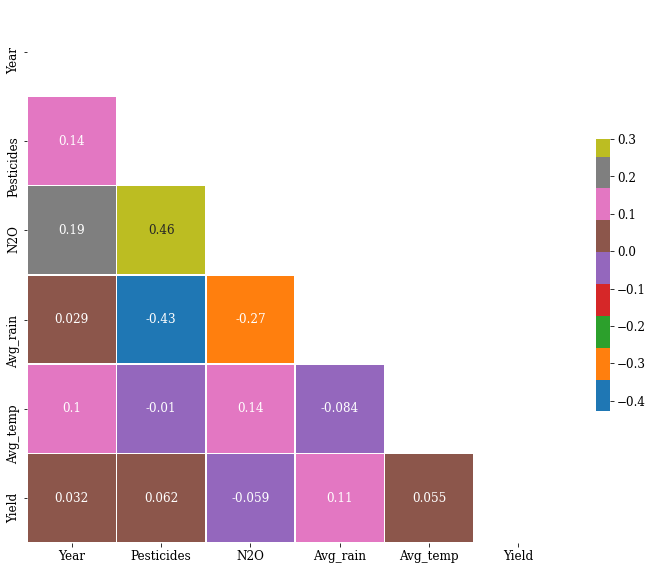

In [58]:
correlation_data = df_yield.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data,dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (12,10))

# Generate a custom diverging colormap
#cmap =sns.palettes="vlag"
cmap =sns.color_palette("tab10")
#cmap=plt.cm.Reds

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data,mask=mask,  annot=True, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5})

#sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            #square=True, linewidths=.5, cbar_kws={"shrink": .5});

#plt.savefig('./figures/correlation.eps')


## Data Preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.



In [59]:
df_yield.head()

,Country,Year,Pesticides,N2O,Avg_rain,Avg_temp,Crop,Yield
0,Burundi,1990,92,2.9406,103.075,20.408333,"Beans, dry",13184
1,Burundi,1990,92,2.9406,103.075,20.408333,"Coffee, green",7742
2,Burundi,1990,92,2.9406,103.075,20.408333,Potatoes,34836
3,Burundi,1990,92,2.9406,103.075,20.408333,Tea,7742
4,Comoros,1990,1,0.1299,154.250,24.308333,"Coffee, green",1475


# doing feature selection

In [60]:
from lightgbm import LGBMRegressor

In [61]:
# df_yield_dummy = pd.get_dummies(df_yield,columns=['Crop','Country'],
#                                prefix=['Crop','Country'])
# X = df_yield_dummy.loc[:,df_yield_dummy.columns != 'Yield']
# Y = df_yield['Yield']

# from sklearn.ensemble import GradientBoostingRegressor
# gbm_se = LGBMRegressor()
# gm_model = gbm_se.fit(X,Y)

# varimp_rf = {'Relative Importance':gm_model.feature_importances_,
#           'Features':df_yield_dummy.columns[df_yield_dummy.columns != "Yield"]}

# #a4_dims = (8.27,16.7)
# a4_dims = (16.7, 8.27)

# fig, ax = plt.subplots(figsize=a4_dims)
# df=pd.DataFrame.from_dict(varimp_rf)
# df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
# df=df.dropna()

# sns.barplot(x="Relative Importance",y="Features",palette="vlag",data=df,orient="h",ax=ax);

## Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [62]:
from sklearn.preprocessing import OneHotEncoder
## I realize importing the above package can guarantee you to drop Year

In [63]:
df_yield_dummy = pd.get_dummies(df_yield,columns=['Crop'],
                               prefix=['Crop'])

In [64]:
# shape and size of the dumming variables
print(df_yield_dummy.shape)
print(df_yield_dummy.size)

(1304, 11)
14344


In [65]:
a =df_yield.describe()
a

,Year,Pesticides,N2O,Avg_rain,Avg_temp,Yield
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,2004.257669,1008.997699,18.967851,89.719280,22.912053,38004.441718
std,8.275264,1270.135176,26.585194,33.371296,1.909362,52876.178027
min,1990.000000,0.000000,0.006300,16.716667,19.033333,520.000000
25%,1997.000000,88.000000,3.602300,68.154167,21.958333,6541.000000
50%,2004.000000,383.000000,10.473400,88.316667,22.800000,11280.500000
75%,2011.000000,1670.000000,21.425200,106.791667,24.200000,49560.000000
max,2018.000000,6753.000000,142.560500,211.708333,28.091667,316235.000000


In [66]:
print(a.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &         Year &   Pesticides &          N2O &     Avg\_rain &     Avg\_temp &          Yield \\
\midrule
count &  1304.000000 &  1304.000000 &  1304.000000 &  1304.000000 &  1304.000000 &    1304.000000 \\
mean  &  2004.257669 &  1008.997699 &    18.967851 &    89.719280 &    22.912053 &   38004.441718 \\
std   &     8.275264 &  1270.135176 &    26.585194 &    33.371296 &     1.909362 &   52876.178027 \\
min   &  1990.000000 &     0.000000 &     0.006300 &    16.716667 &    19.033333 &     520.000000 \\
25\%   &  1997.000000 &    88.000000 &     3.602300 &    68.154167 &    21.958333 &    6541.000000 \\
50\%   &  2004.000000 &   383.000000 &    10.473400 &    88.316667 &    22.800000 &   11280.500000 \\
75\%   &  2011.000000 &  1670.000000 &    21.425200 &   106.791667 &    24.200000 &   49560.000000 \\
max   &  2018.000000 &  6753.000000 &   142.560500 &   211.708333 &    28.091667 &  316235.000000 \\
\bottomrule
\end{tabular}



In [67]:
features = df_yield_dummy.loc[:,df_yield_dummy.columns != 'Yield']


features.head()

,Country,Year,Pesticides,N2O,Avg_rain,Avg_temp,"Crop_Beans, dry","Crop_Coffee, green",Crop_Potatoes,Crop_Tea
0,Burundi,1990,92,2.9406,103.075,20.408333,1,0,0,0
1,Burundi,1990,92,2.9406,103.075,20.408333,0,1,0,0
2,Burundi,1990,92,2.9406,103.075,20.408333,0,0,1,0
3,Burundi,1990,92,2.9406,103.075,20.408333,0,0,0,1
4,Comoros,1990,1,0.1299,154.250,24.308333,0,1,0,0


In [68]:
features = features.drop(['Year','Country'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pesticides          1304 non-null   int64  
 1   N2O                 1304 non-null   float64
 2   Avg_rain            1304 non-null   float64
 3   Avg_temp            1304 non-null   float64
 4   Crop_Beans, dry     1304 non-null   uint8  
 5   Crop_Coffee, green  1304 non-null   uint8  
 6   Crop_Potatoes       1304 non-null   uint8  
 7   Crop_Tea            1304 non-null   uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 56.0 KB


In [69]:
features.head()

,Pesticides,N2O,Avg_rain,Avg_temp,"Crop_Beans, dry","Crop_Coffee, green",Crop_Potatoes,Crop_Tea
0,92,2.9406,103.075,20.408333,1,0,0,0
1,92,2.9406,103.075,20.408333,0,1,0,0
2,92,2.9406,103.075,20.408333,0,0,1,0
3,92,2.9406,103.075,20.408333,0,0,0,1
4,1,0.1299,154.250,24.308333,0,1,0,0


In [70]:
# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

In [71]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

def check_normality(df, cname, return_log_transform=True):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, 
                                        figsize=(12,12),
                                        dpi = 80)
    
    
    # <<< 1ST Plot >>> 
    sns.distplot(df[cname] , 
                  fit=norm,
                  hist_kws=dict(edgecolor="black", 
                                    linewidth=2,
                                   color='blue'), 
                  kde_kws={'linestyle':'--', 
                           'linewidth':2,
                          "color": "darkgreen", 
                           "label": "KDE"},
                        ax=ax1)
    ax1.grid(True, linestyle='--')

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[cname])
    # print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    ax1.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                loc='best')
    # ax1.set_ylabel('Frequency')
    ax1.set_title('{} distribution'.format(cname))
   

    # <<< 2ND Plot >>> 
    #Get QQ-plot
    res = stats.probplot(np.unique(df[cname].values),
                         plot=ax2, 
                         rvalue=True)
    ax2.grid(True, linestyle='--')
    
    #print('yes')

    ## Log-transformation of the target variable
    #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#     df[cname] = np.log1p(df[cname])

    #Check the new distribution 
    sns.distplot(np.log1p(df[cname]),
                 fit=norm,
                 hist_kws=dict(edgecolor="black", 
                                    linewidth=2,
                                   color='blue'), 
                  kde_kws={'linestyle':'--', 
                           'linewidth':2,
                          "color": "darkgreen", 
                           "label": "KDE"},
                        ax=ax3)
    ax3.grid(True, linestyle='--')

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(np.log1p(df[cname]))
    # print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    ax3.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    # plt.ylabel('Frequency')
    ax3.set_title('{} distribution in log scale'.format(cname))

    #Get also the QQ-plot
    res = stats.probplot(np.unique(np.log1p(df[cname]).values), plot=ax4,
                    rvalue=True)
    
    fig.tight_layout()
    #fig.savefig('./Fig2/dist.eps')
    #fig.savefig('./Fig2/dist.jpeg')
    
    if return_log_transform is True:
        return np.log1p(df[cname])

In [72]:
cname=["Yield"]
np.unique(df_yield[cname].values)

array([   520,    541,    570, ..., 239781, 251918, 316235])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-73-b5af38f9ffd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

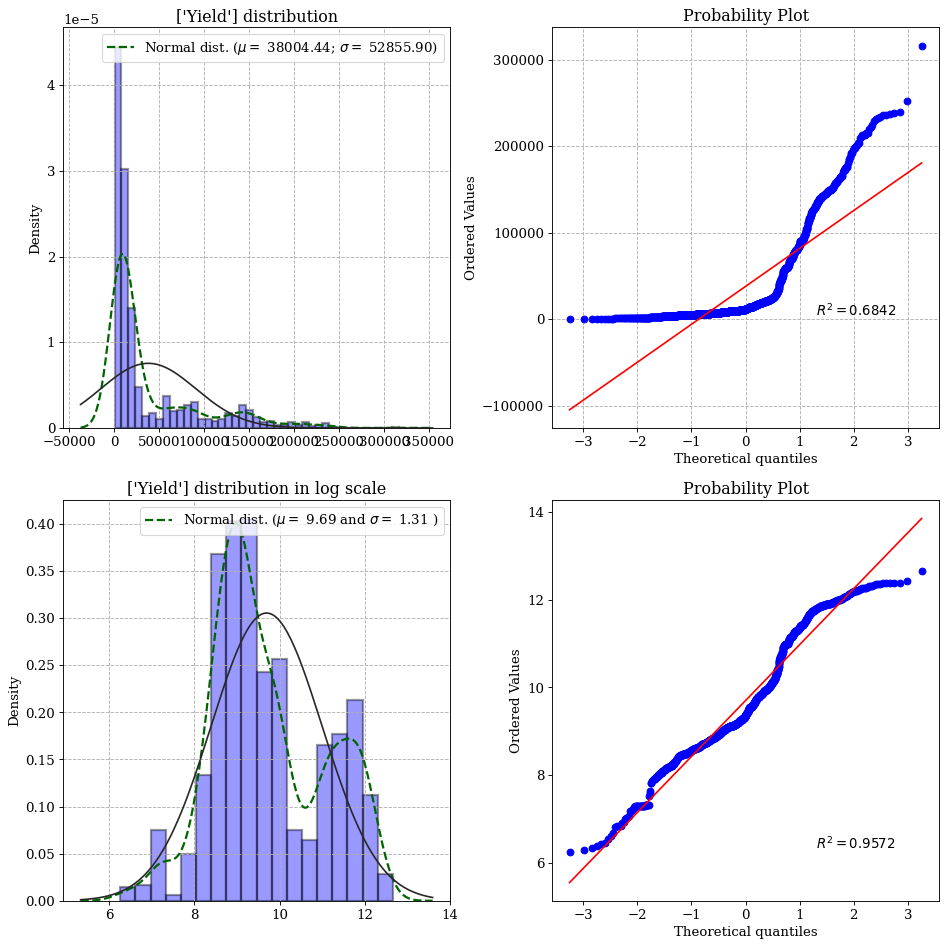

In [73]:
df_yield['Yield_log']=check_normality(df=df_yield, cname=["Yield"], return_log_transform=True)

In [74]:
#check_normality(df=df_yield, cname=["Yield"], return_log_transform=False)

In [75]:

df_yield.describe()
#print(a.to_latex(index=False))

,Year,Pesticides,N2O,Avg_rain,Avg_temp,Yield,Yield_log
count,1304.000,1304.000,1304.000,1304.000,1304.000,1304.000,1304.000
mean,2004.258,1008.998,18.968,89.719,22.912,38004.442,9.695
std,8.275,1270.135,26.585,33.371,1.909,52876.178,1.306
min,1990.000,0.000,0.006,16.717,19.033,520.000,6.256
25%,1997.000,88.000,3.602,68.154,21.958,6541.000,8.786
50%,2004.000,383.000,10.473,88.317,22.800,11280.500,9.331
75%,2011.000,1670.000,21.425,106.792,24.200,49560.000,10.811
max,2018.000,6753.000,142.560,211.708,28.092,316235.000,12.664


In [76]:
df_yield.groupby(['Crop'],sort=True)['Yield_log'].sum().nlargest(7)

Crop
Potatoes        4232.878
Tea             3295.364
Coffee, green   2749.703
Beans, dry      2363.980
Name: Yield_log, dtype: float64

In [78]:
features

,Pesticides,N2O,Avg_rain,Avg_temp,"Crop_Beans, dry","Crop_Coffee, green",Crop_Potatoes,Crop_Tea
0,92,2.941,103.075,20.408,1,0,0,0
1,92,2.941,103.075,20.408,0,1,0,0
2,92,2.941,103.075,20.408,0,0,1,0
3,92,2.941,103.075,20.408,0,0,0,1
4,1,0.130,154.250,24.308,0,1,0,0
...,...,...,...,...,...,...,...,...
1299,1670,20.457,84.667,22.008,0,0,0,1
1300,2185,12.643,50.550,22.017,1,0,0,0
1301,2185,12.643,50.550,22.017,0,1,0,0
1302,2185,12.643,50.550,22.017,0,0,1,0


## Scaling Features:
Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [79]:
from sklearn.preprocessing import MinMaxScaler


In [80]:
#from sklearn.preprocessing import StandardScaler

In [81]:
#sca = StandardScaler()
#features1 = sca.fit_transform(features)

In [82]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [83]:
features

array([[0.01362357, 0.02058375, 0.44288217, ..., 0.        , 0.        ,
        0.        ],
       [0.01362357, 0.02058375, 0.44288217, ..., 1.        , 0.        ,
        0.        ],
       [0.01362357, 0.02058375, 0.44288217, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.3235599 , 0.08864418, 0.17351169, ..., 1.        , 0.        ,
        0.        ],
       [0.3235599 , 0.08864418, 0.17351169, ..., 0.        , 1.        ,
        0.        ],
       [0.3235599 , 0.08864418, 0.17351169, ..., 0.        , 0.        ,
        1.        ]])

## Training Data:
The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset)



In [84]:
label = df_yield['Yield_log']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train_X, test_X, train_Y, test_Y= train_test_split(features, label,test_size=0.3,
                                                   random_state=42)

In [87]:
print('shape of train data:', train_X.shape)
print('shape of test data:', test_X.shape)
print('shape of train label:', train_Y.shape)
print('shape of test labes:', test_Y.shape)

shape of train data: (912, 8)
shape of test data: (392, 8)
shape of train label: (912,)
shape of test labes: (392,)


In [88]:
test_Y

1172    6.428
514     9.945
843     9.856
977     9.549
1168   11.569
        ...  
636    11.703
462     8.854
806     9.166
990     9.214
1210   10.855
Name: Yield_log, Length: 392, dtype: float64

In [89]:
label

0       9.487
1       8.955
2      10.458
3       8.955
4       7.297
        ...  
1299    9.558
1300    8.980
1301    6.441
1302   10.635
1303    9.229
Name: Yield_log, Length: 1304, dtype: float64

## Part Four: Model Comparison & Selection
Before deciding on an algorithem to use, first we need to evaluate, compare and choose the best one that fits this specific dataset.

Usually, when working on a machine learning problem with a given dataset, we try different models and techniques to solve an optimization problem and fit the most accurate model, that will neither overfit nor underfit the model.

For this project, we'll compare between the following models :

1) Gradient Boosting Regressor

2) Random Forest Regressor

3) Support Vector Regressor



 why use r2_score
    https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/
    
    
why some metrics: https://stats.stackexchange.com/questions/545979/why-getting-very-high-values-for-mse-mae-mape-when-r2-score-is-very-good

In [90]:

from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

In [91]:
### r2 is r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_X,train_Y)
    y_pred = fit.predict(test_X)
    r2 = r2_score(test_Y,y_pred)
    return([model_name, r2])

### rmse is the root mean square error
def compare_models1(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_X,train_Y)
    y_pred = fit.predict(test_X)
    mse = mean_squared_error(test_Y, y_pred)
    return([model_name, mse])



###### mae represent mean absolute error
def compare_models2(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_X,train_Y)
    y_pred = fit.predict(test_X)
    mae = mean_absolute_error(test_Y,y_pred)
    return([model_name, mae])


#3## MAPE
def compare_models3(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_X,train_Y)
    y_pred = fit.predict(test_X)
    mape = mean_absolute_percentage_error(test_Y,y_pred)
    return([model_name, mape])

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import   GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

In [93]:
models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    SVR(),
    LGBMRegressor()
    #XGBRegressor()
]

In [94]:
model_train  = list(map(compare_models,models))
model_train1 = list(map(compare_models1, models))
model_train2 = list(map(compare_models2, models))
model_train3 = list(map(compare_models3, models))
print("Model_train check R2_Score:",*model_train, sep="\n")
print()
print("Model_train1 check RMSE:", *model_train1, sep="\n")
print()
print("Model_train2 check MAE:", *model_train2,sep="\n")
print("Model_train3 check MAPE:", *model_train3,sep="\n")

#model_train
#print('model =', *model_train,sep="\n")

Model_train check R2_Score:
['GradientBoostingRegressor', 0.9023238645180182]
['RandomForestRegressor', 0.9257349271827671]
['SVR', 0.8637708481466038]
['LGBMRegressor', 0.9273250074719191]

Model_train1 check RMSE:
['GradientBoostingRegressor', 0.16080904315797145]
['RandomForestRegressor', 0.12196947781829806]
['SVR', 0.22506168181704364]
['LGBMRegressor', 0.12006502148683236]

Model_train2 check MAE:
['GradientBoostingRegressor', 0.2983200014746006]
['RandomForestRegressor', 0.22256111384979924]
['SVR', 0.32647348540443033]
['LGBMRegressor', 0.23766444138406967]
Model_train3 check MAPE:
['GradientBoostingRegressor', 0.032007198134809026]
['RandomForestRegressor', 0.02414965820918595]
['SVR', 0.035041257333868835]
['LGBMRegressor', 0.025390984209892067]


In [92]:
# Set general font size
#plt.rcParams['font.size'] = '12'



In [93]:
# models = [
#    GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
#                              random_state=1, subsample=0.75)
# ]

In [94]:
#### Random forest analysis

# Execution Time

In [95]:
import time

In [96]:
import time
rf = RandomForestRegressor()

start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
model_rf = rf.fit(train_X,train_Y)

print("RF--- %s seconds ---" % (time.time() - start_time))

gbm = GradientBoostingRegressor()
start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
model_gbm = gbm.fit(train_X,train_Y)

print("GBM--- %s seconds ---" % (time.time() - start_time))


###################
svm1= SVR()
start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
model_svm = svm1.fit(train_X,train_Y)

print("SVM--- %s seconds ---" % (time.time() - start_time))



# RF--- 0.27539968490600586 seconds ---
# GBM--- 0.08258891105651855 seconds ---
# SVM--- 0.03095245361328125 seconds ---
# 

RF = 0.2754
GBM = 0.0826
SVM =0.0310

RF--- 1.1525413990020752 seconds ---
GBM--- 0.3181750774383545 seconds ---
SVM--- 0.14061951637268066 seconds ---


In [97]:
#sns.set_theme()


##https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d

In [98]:
a = [2.33334,1.99993,0.367098]
np.round(a,3)

array([2.333, 2.   , 0.367])

### Cross Validation

In [95]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 5)
        maes.append(mae)
        mae_avg = round(mae.mean(), 5)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 5)
        mses.append(mse)
        mse_avg = round(mse.mean(), 5)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 5)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 5)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 5)
        accs.append(acc)
        acc_avg = round(acc.mean(), 5)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [96]:
# Create the models to be tested
Support_Vector_Machine = SVR()
svm_reg = Support_Vector_Machine
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()

# Put the models in a list to be used for Cross-Validation
models = [svm_reg, rf_reg, gb_reg]

#Run the Cross-Validation comparison with the models used in this analysis
comp,maes, mses, r2s, accs = cv_comparison(models, train_X, train_Y, 5)

comp.columns=['Support Vector Machine', 'Random Forest',
              'Gradient Boosting Machine']
comp
#np.sqrt(0.137)

,Support Vector Machine,Random Forest,Gradient Boosting Machine
Mean Absolute Error,0.326,0.226,0.290
Mean Squared Error,0.235,0.132,0.164
R^2,0.863,0.921,0.905
Accuracy,96.649,97.673,97.019


In [98]:
# Create DataFrame for all R^2s
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold','5th Fold'])

# Add a column for the averages
r2_comp['Average'] = np.round(r2_comp.mean(axis=1),5)


# # Call the comparison function with the three final models
# final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)

# # Adjust the column headers
# final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']


r2_comp.index=['Support Vector Machine','Random Forest',
               'Gradient Boosting Machine']
r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,5th Fold,Average
Support Vector Machine,0.856,0.849,0.859,0.889,0.866,0.863
Random Forest,0.927,0.933,0.896,0.932,0.918,0.921
Gradient Boosting Machine,0.916,0.898,0.890,0.934,0.886,0.905


# PARAMETER TUNING

### Parameter tuning of GBM

In [ ]:
hymode_gbm = GradientBoostingRegressor()
hymode_gbm.get_params()

In [ ]:
a = np.linspace(0.01,1.0,10)
a

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


GBR=GradientBoostingRegressor()

parameters = {'learning_rate': np.linspace(0.01,1.0,10),
              'min_samples_split':[int(1) for i in range(50)],
              'max_depth':range(5,16,2),
              'subsample': [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [20,90,100,500,1000, 1500],
              'learning_rate':[.001,0.01,.1],
              'random_state':[0,1,32,42],
              'max_features':["auto", "sqrt", "log2"]
              
                 }

 

search_grid={'n_estimators':[200,500,1000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[4,5,7,10],
             'subsample':[.5,.75,1],
             'random_state':[1,32,42]
            }

search=GridSearchCV(estimator=GBR,param_grid=search_grid,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1,cv=5)

start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
search.fit(train_X,train_Y)

print("--- %s seconds ---" % (time.time() - start_time))

#search.best_params_



gbm_grid = search.best_estimator_
# grid_accuracy = evaluate(best_grid, test_features, test_labels)
gbm_grid


# --- 1883.5312676429749 seconds ---
# GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
#                           random_state=1, subsample=0.75)

In [ ]:
best_gbm = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                          random_state=1, subsample=0.75)

# y_pred_tune = model_hygbm.predict(test_X)
# R2_GBM =r2_score(test_Y,y_pred_tune)
# R2_GBM

### Hyperparameter tuning for Random Forest

In [ ]:
b =RandomForestRegressor()
b.get_params()

In [ ]:
# param_grid = {
#     'bootstrap': [True,False],
#     "n_estimators":[100,200,300, 10000],
#     "max_depth":[5, 10, 50, 100],
#     "min_samples_split": [8, 10, 12],
#     "max_features": ["auto", "sqrt", "log2"]
# }

#Create the parameter grid based on the results of random search 

param_grid = {
    #'bootstrap': [True,False],
    #'max_depth':[10,13,25,50],
    'max_depth': [i for i in range(3,25)],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [33,92,100,200,300,1000],
    #'random_state':[0,1,32,42],
    'n_estimators': [i for i in range(5,200)]
   
    
}

rf = RandomForestRegressor(bootstrap=False, random_state=32)


reg_tuned = GridSearchCV(estimator=rf,
                            param_grid=param_grid,
                            cv=5,
                            n_jobs=-1, verbose=1
                        )

start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
reg_tuned.fit(train_X,train_Y)

print("--- %s seconds ---" % (time.time() - start_time))

grid_rf = reg_tuned.best_estimator_
grid_rf

In [ ]:
# best_rf = RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
#                       min_samples_split=8, n_estimators=200)

# best_rf = RandomForestRegressor(bootstrap=False, max_depth=13, 
#                                 max_features='log2', min_samples_leaf=3, 
#                                 min_samples_split=8, n_estimators=33) ### GAVE BEST

# best_rf = RandomForestRegressor(bootstrap=False, max_depth=13,
#                                 max_features='log2',min_samples_leaf=3,
#                                 min_samples_split=8, n_estimators=92,
#                                 random_state=1)

# best_rf =RandomForestRegressor(bootstrap=False, max_depth=14,
#                                max_features='log2',min_samples_leaf=3,
#                                min_samples_split=8,
#                                n_estimators=27,random_state=1)### best for now

best_rf = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',
                      min_samples_leaf=3, n_estimators=81, random_state=32)

# pre_rf_tun = model_rf_tuned.predict(test_X)
# score = r2_score(test_Y,pre_rf_tun)
# score

### Parameter tuning of SVM

In [ ]:
A =SVR()
A.get_params()
# hymode_gbm = GradientBoostingRegressor()
# hymode_gbm.get_params()

In [ ]:
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
#grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
tune_svm = GridSearchCV( SVR(),
                        param_grid,
                        cv =5)
start_time = time.time()

#rf_reg_tuned.fit(test_X, train_Y)
tune_svm.fit(train_X,train_Y)

print("--- %s seconds ---" % (time.time() - start_time))

grid_svm = tune_svm.best_estimator_
grid_svm

In [ ]:
SVR().get_params

In [103]:
best_svm = SVR(C=100, gamma=1)
best_gbm = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                          random_state=1, subsample=0.75)
best_rf = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',
                      min_samples_leaf=3, n_estimators=81, random_state=32)


In [104]:
final_rf = best_rf.fit(train_X,train_Y)
final_gbm = best_gbm.fit(train_X,train_Y)
final_svm = best_svm.fit(train_X,train_Y)

In [105]:
#Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 5)
        mse = round(mean_squared_error(test_labels, predictions), 5)
        r2 = round(r2_score(test_labels, predictions), 5)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 5)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [106]:
#Call the comparison function with the three final models
final_scores = final_comparison([final_svm,final_rf,final_gbm], 
                                test_X, test_Y)

# Adjust the column headers
final_scores.columns  = ['Support Vector Machine',
                         'Random Forest', 'Gradient Boosting Machine']

In [107]:
final_scores

,Support Vector Machine,Random Forest,Gradient Boosting Machine
Mean Absolute Error,0.270,0.216,0.227
Mean Squared Error,0.169,0.108,0.119
R^2,0.898,0.934,0.928
Accuracy,97.094,97.695,97.561


### Line curve

In [108]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [109]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [110]:
# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

# title = "Learning Curves (Naive Bayes)"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = GaussianNB()
# plot_learning_curve(
#     estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )

# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(
#     estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )

# plt.show()

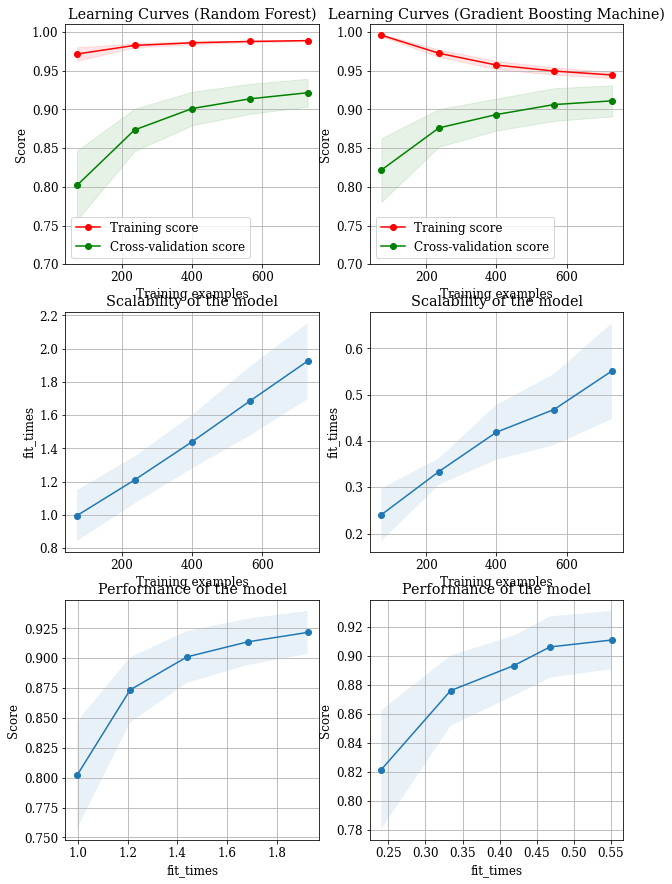

In [111]:
### Learning curves of RF and GBM

fig, axes = plt.subplots(3, 2, figsize=(10, 15))



title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (Gradient Boosting Machine)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                                      #random_state=1, subsample=0.75)
estimator =GradientBoostingRegressor()
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

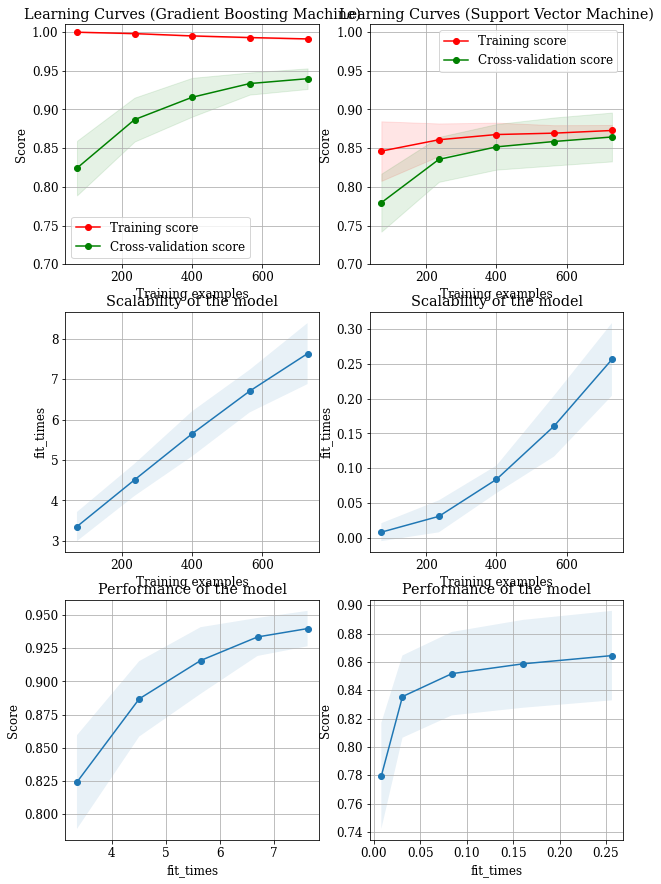

In [112]:
### Learning curves of GBM and SVM


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = r"Learning Curves (Gradient Boosting Machine)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                        random_state=1, subsample=0.75)
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)



title = "Learning Curves (Support Vector Machine)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVR()
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)


plt.show()

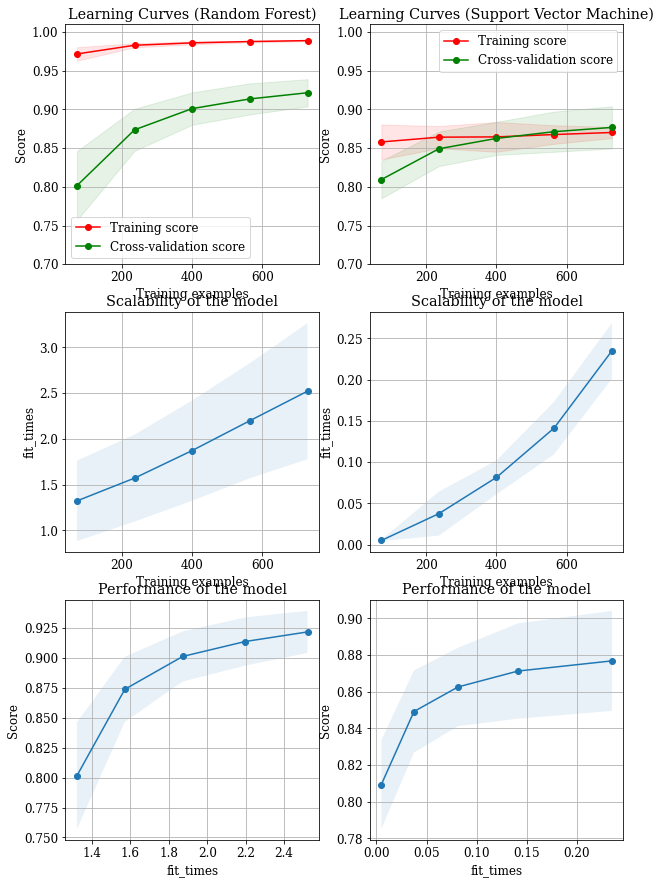

In [113]:
### Learning curves of RF and SVM


fig, axes = plt.subplots(3, 2, figsize=(10, 15))



title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (Support Vector Machine)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVR()
plot_learning_curve(
    estimator, title, train_X, train_Y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
# #train_sizes = np.linspace(0, 1,729)
# #train_sizes = np.arange(0,0.001,1)
# # import random

# # train_sizes = [random.uniform(0,1) for i in range(0, 10)]
# train_sizes=np.linspace(0.1, 1.0, 5)


# ### Bundling our previous work into a function ###
# def learning_curves(estimator, features, label, train_sizes, cv):
#     train_sizes, train_scores, validation_scores = learning_curve(
#     estimator, features, label, train_sizes =
#     train_sizes,
#     cv = cv, scoring = 'neg_mean_squared_error')
#     train_scores_mean = -train_scores.mean(axis = 1)
#     validation_scores_mean = -validation_scores.mean(axis = 1)

#     plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#     plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

#     plt.ylabel('MSE', fontsize = 14)
#     plt.xlabel('Training set size', fontsize = 14)
#     title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
#     plt.title(title, fontsize = 18, y = 1.03)
#     plt.legend()
#     plt.ylim(0,0.5)

# ### Plotting the two learning curves ###

# # from sklearn.ensemble import RandomForestRegressor

# # plt.figure(figsize = (16,5))

# # for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
# #     plt.subplot(1,2,i)
# #     learning_curves(model, electricity, features, target, train_sizes, 5)


# plt.figure(figsize = (16,5))

# for model, i in [(RandomForestRegressor(), 1), (GradientBoostingRegressor(),2)]:
#     plt.subplot(1,2,i)
#     learning_curves(model,train_X, train_Y, train_sizes, 5)

## Solving for random forest

In [ ]:

# pre_train = model_rf.predict(train_X)
# r2 = r2_score(train_Y,pre_train)
# rmse = np.sqrt(mean_squared_error(train_Y,pre_train))

# ###test aspect
# pre_test = model_rf.predict(test_X)
# r2_1 =r2_score(test_Y,pre_test)
# print('results_train =',r2,rmse)
# print('results_test = ', r2_1)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# param_grid = {
#     "n_estimators":[100,200,300, 10000],
#     "max_depth":[10, 50, 100],
#     'min_samples_split': [8, 10, 12],
#     "max_features":[6,8,10,12,14,16]
# }

# Create the parameter grid based on the results of random search 

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [i for i in range(3,25)],
#     'max_features': ["auto", "sqrt", "log2"],
#     #'min_samples_leaf': [3, 4, 5],
#     #'min_samples_split': [8, 10, 12],
#     'n_estimators': [i for i in range(5,111)]
# }

# rf = RandomForestRegressor(random_state=42)


#reg_tuned = GridSearchCV(estimator=rf,
#                             param_grid=param_grid,
#                             cv=5,
#                             n_jobs=-1,
#                             verbose=2)

# start_time = time.time()

# #rf_reg_tuned.fit(test_X, train_Y)
# c =reg_tuned.fit(train_X,train_Y)

# # print("--- %s seconds ---" % (time.time() - start_time))A

In [114]:
a = df_yield_dummy.head(n=5)
a

,Country,Year,Pesticides,N2O,Avg_rain,Avg_temp,Yield,"Crop_Beans, dry","Crop_Coffee, green",Crop_Potatoes,Crop_Tea
0,Burundi,1990,92,2.941,103.075,20.408,13184,1,0,0,0
1,Burundi,1990,92,2.941,103.075,20.408,7742,0,1,0,0
2,Burundi,1990,92,2.941,103.075,20.408,34836,0,0,1,0
3,Burundi,1990,92,2.941,103.075,20.408,7742,0,0,0,1
4,Comoros,1990,1,0.130,154.250,24.308,1475,0,1,0,0


In [115]:
final_rf = best_rf.fit(train_X,train_Y)
final_gbm = best_gbm.fit(train_X,train_Y)
final_svm = best_svm.fit(train_X,train_Y)

In [116]:

df_yield_dummy = df_yield_dummy.drop(columns=['Year', 'Country'])

In [118]:

test_df = pd.DataFrame(test_X,
                       columns=df_yield_dummy.loc[:,df_yield_dummy.columns !='Yield'].columns)

In [119]:

itm = test_df[[col for col in test_df.columns if 'Crop' in col]].stack()[
    test_df[[col for col in test_df.columns if 'Crop' in col]].stack()>0]

#itm = test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]

itmlist =list(pd.DataFrame(itm).index.get_level_values(1))

items = [i.split("_")[1] for i in itmlist]

In [120]:
test_df.head()

,Pesticides,N2O,Avg_rain,Avg_temp,"Crop_Beans, dry","Crop_Coffee, green",Crop_Potatoes,Crop_Tea
0,0.004,0.037,0.037,0.944,1.000,0.000,0.000,0.000
1,0.013,0.121,0.442,0.491,0.000,0.000,0.000,1.000
2,0.479,0.079,0.157,0.314,0.000,0.000,0.000,1.000
3,0.247,0.125,0.323,0.327,0.000,0.000,0.000,1.000
4,0.007,0.033,0.466,0.200,0.000,0.000,1.000,0.000


In [121]:
test_df.drop([col for col in test_df.columns if 'Crop' in col],axis=1, inplace=True)

#test_df.drop([col for col in test_df.columns if 'Country' in col],
            #axis=1, inplace=True)
test_df.head()


,Pesticides,N2O,Avg_rain,Avg_temp
0,0.004,0.037,0.037,0.944
1,0.013,0.121,0.442,0.491
2,0.479,0.079,0.157,0.314
3,0.247,0.125,0.323,0.327
4,0.007,0.033,0.466,0.200


In [122]:
#test_df['Country'] =countries
test_df['Crop'] = items
test_df.head()

,Pesticides,N2O,Avg_rain,Avg_temp,Crop
0,0.004,0.037,0.037,0.944,"Beans, dry"
1,0.013,0.121,0.442,0.491,Tea
2,0.479,0.079,0.157,0.314,Tea
3,0.247,0.125,0.323,0.327,Tea
4,0.007,0.033,0.466,0.200,Potatoes


In [123]:
# clf = GradientBoostingRegressor()
# model = clf.fit(train_data,train_labels)

# test_df["yield_predicted"] = model.predict(test_data)
# test_df["yield_actual"] = pd.DataFrame(test_labels)["hg/ha_yield"].tolist()


In [124]:
# test_df['yield_predicted']

In [125]:
test_Y

1172    6.428
514     9.945
843     9.856
977     9.549
1168   11.569
        ...  
636    11.703
462     8.854
806     9.166
990     9.214
1210   10.855
Name: Yield_log, Length: 392, dtype: float64

In [126]:
a =pd.DataFrame(test_Y)

In [127]:
rclf = RandomForestRegressor()
#rclf = best_rf
#rclf = best_c
rf_model = rclf.fit(train_X,train_Y)
test_df1 = test_df
test_df1["yield_predicted"] = rf_model.predict(test_X)
test_df1["yield_actual"] = pd.DataFrame(test_Y)["Yield_log"].tolist()
residuals_rf = test_df1["yield_actual"] - test_df1["yield_predicted"]
r21 = r2_score(test_df1["yield_actual"],test_df1["yield_predicted"])
test_group = test_df1.groupby("Crop")
test_group.apply(lambda x : r2_score(x.yield_actual, x.yield_predicted))
r21

0.9263000289812037

In [128]:
# Set general font size
#plt.rcParams['font.size'] = '12'



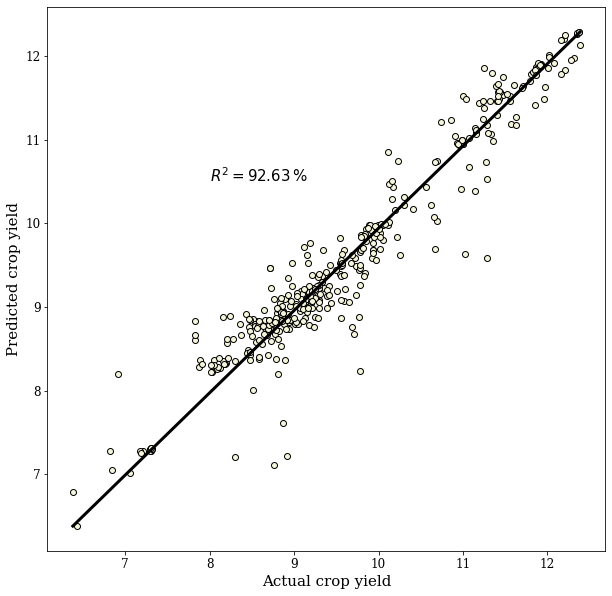

In [129]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots( figsize=[10,10])

ax.scatter(test_df1['yield_actual'], test_df1["yield_predicted"],c='beige',
          edgecolors=(0,0,0))

# sns.regplot(test_df1['yield_actual'], test_df1["yield_predicted"],data=test_df1,
#             scatter_kws={"color": "black" }, 
#             line_kws={"color": "red", 'label':'Line of best fit'})

# ax.plot(test_df1['yield_actual'],test_df1['yield_actual']+0, ':b',
#        label='Identity line ($1:1$)')

ax.plot([test_df1['yield_actual'].min(),test_df1['yield_actual'].max()],
         [test_df1["yield_predicted"].min(),test_df1["yield_predicted"].max()],
        c='k',lw=3)

#ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

ax.set_xlabel('Actual crop yield',fontsize=15)
ax.set_ylabel('Predicted crop yield', fontsize = 15)
#ax.set_title("Crop yield prediction using Random Forest")
ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df1['yield_actual'],
                                                       test_df1["yield_predicted"])*100),fontsize=15)
        #.format(np.corrcoef(test_df1['yield_actual'],
                                                       #test_df1["yield_predicted"])[0,1]**2*100)
#leg = plt.legend(loc='best')
#mpl_axes_aligner.align.yaxes(ax, 0,)


# # Hide the right and top spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Only show ticks on the left and bottom spines
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

#plt.savefig('./Fig3/random_PT1.jpeg', bbox_inches='tight')
plt.savefig('./Fig6/random_PT1_2.jpeg', bbox_inches='tight')


#r21 = r2_score(test_df1["yield_actual"],test_df1["yield_predicted"])

#plt.text(7,12,'$R^2$ = {}'.format(r21))

# plt.xlim([6.5, 12.5])
# plt.ylim([6.5, 12.5])
plt.show()

In [130]:
# import mpl_axes_aligner

In [131]:
# # So let's run the model actual values against the predicted ones 

# fig, ax = plt.subplots( figsize=[10,10])

# # ax.scatter(test_df1['yield_actual'], test_df1["yield_predicted"],c='blue',
# #           edgecolors=(0,0,0))
# sns.regplot(test_df1['yield_actual'], test_df1["yield_predicted"],data=test_df1,
#             scatter_kws={"color": "black" }, 
#             line_kws={"color": "red", 'label':'Line of best fit'})

# ax.plot(test_df1['yield_actual'],test_df1['yield_actual']+0, ':b',
#        label='Identity line ($1:1$)')

# # ax.plot([test_df1['yield_actual'].min(),test_df1['yield_actual'].max()],
# #          [test_df1["yield_predicted"].min(),test_df1["yield_predicted"].max()],
# #          label='theoretical line', c='b',lw=3)

# #ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title("Crop yield prediction using Random Forest")
# ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df1['yield_actual'],
#                                                        test_df1["yield_predicted"])*100),fontsize=15)
#         #.format(np.corrcoef(test_df1['yield_actual'],
#                                                        #test_df1["yield_predicted"])[0,1]**2*100)
# leg = plt.legend(loc='best')
# #mpl_axes_aligner.align.yaxes(ax, 0,)


# #plt.savefig('./Fig3/random_PT1.jpeg', bbox_inches='tight')
# plt.savefig('./Fig5/random_PT1_5.jpeg', bbox_inches='tight')


# #r21 = r2_score(test_df1["yield_actual"],test_df1["yield_predicted"])

# #plt.text(7,12,'$R^2$ = {}'.format(r21))

# plt.xlim([6.35, 12.5])
# plt.ylim([6.35,12.5])
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


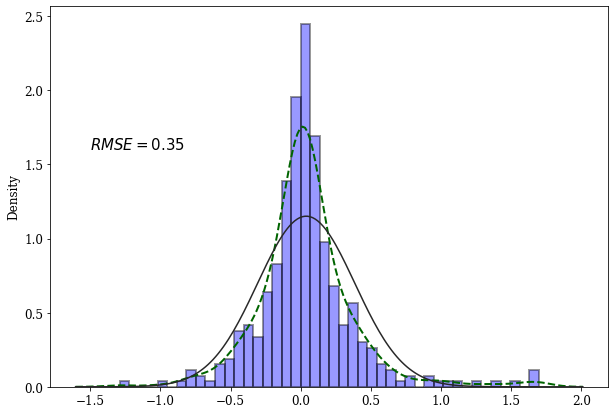

In [132]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

fig, ax1 = plt.subplots( 
    figsize=(10,7))

A = sns.distplot(residuals_rf , fit=norm, 
             hist_kws=dict(edgecolor="black",linewidth=2,
                           color='blue'), 
             kde_kws={'linestyle':'--','linewidth':2, 
                      "color": "darkgreen",
                      "label": "KDE"},ax=ax1,label='RF')

# A.legend()


# ax1.legend(['$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df1['yield_actual'],
#                                      test_df1["yield_predicted"])))],
#                 loc='best')




ax1.text(-1.5,1.6,
        r'$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df1['yield_actual'],
                                     test_df1["yield_predicted"]))),
        fontsize=15
        )
#ax.grid(True, linestyle='--')
#ax.set_title('{} residuals'.format('RF '))

#sm.ProbPlot(residuals_rf).qqplot(line='s', ax=ax2)
#sns.histplot(residuals_lgbm, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
# sns.histplot(residuals_lgbm,kde=True)
# x.set(yticks=[], yticklabels=[], title="Residuals distribution")

#plt.savefig('./Fig3/residuals_rf.jpeg', bbox_inches='tight')
plt.savefig('./Fig5/residuals_rf_5.jpeg', bbox_inches='tight')

#plt.legend('upper left')
plt.show()

In [133]:
#sns.distplot?

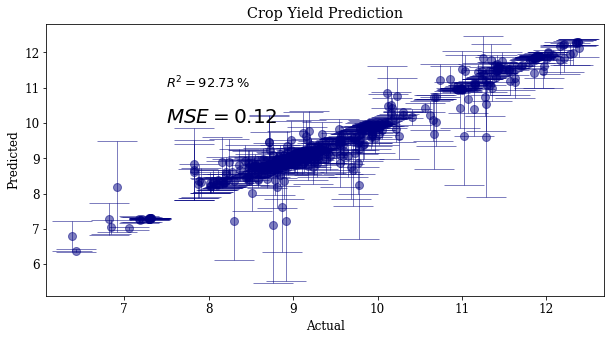

In [134]:
# So let's run the model actual values against the predicted ones 
from sklearn.metrics import mean_squared_error as mse
fig, ax = plt.subplots( figsize=[10,5])

# ax.scatter(test_df1['yield_actual'], test_df1["yield_predicted"],
#           edgecolors=(0,0,0))
#ax.plot([0,test_df1['yield_actual'].max()],[0,test_df1["yield_predicted"].max()], c='k',lw=3)
err = np.std(test_df1["yield_predicted"])/np.sqrt(len(test_df1['yield_actual']))
ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], yerr=abs(test_df1['yield_actual'] -test_df1["yield_predicted"]),
            ms=8, c= 'navy',fmt='o', elinewidth=1,capsize=20, alpha=0.5)
ax.text(7.5,11,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df1['yield_actual'],test_df1["yield_predicted"])[0,1]**2*100), fontsize=13)
ax.text(7.5,10,r'$MSE = {:.2f}$'.format(mse(test_df1['yield_actual'],test_df1["yield_predicted"])), fontsize=20)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Crop Yield Prediction")
#plt.savefig('./figures/rf_actvrspchecking.png', bbox_inches='tight')
plt.show()

In [135]:
err

0.06297612726678689

In [136]:
def adjusted_r_squared(y,yhat,x):
    score = 1-(((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

In [137]:
test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Crop
Beans, dry      0.687
Coffee, green   0.636
Potatoes        0.708
Tea             0.658
dtype: float64

## Part Five: Feature Importance

In [138]:
varimp_rf = {'Relative Importance':rf_model.feature_importances_,
          'Features':df_yield_dummy.columns[df_yield_dummy.columns != "Yield"]}

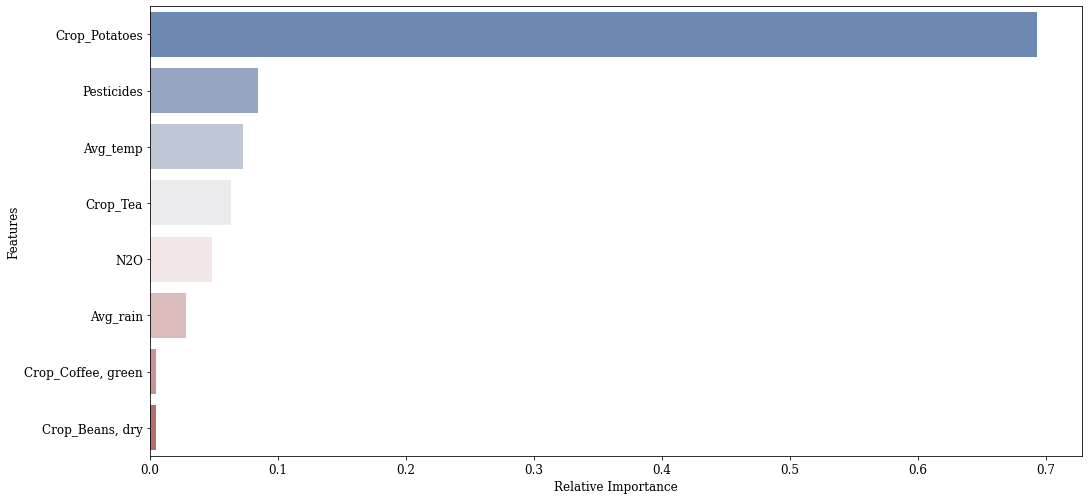

In [139]:
#a4_dims = (8.27,16.7)
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp_rf)
df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
df=df.dropna()

sns.barplot(x="Relative Importance",y="Features",palette="vlag",data=df,orient="h",ax=ax);


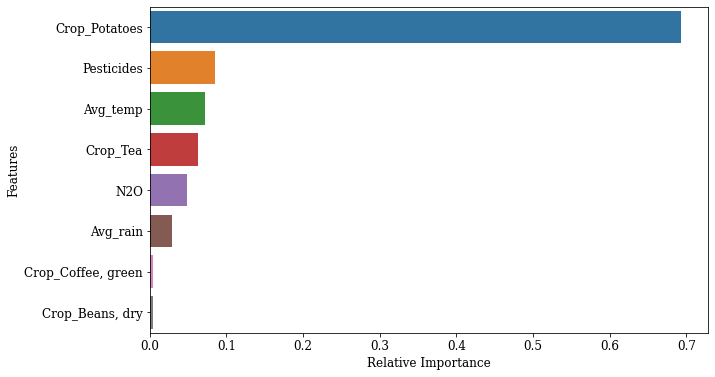

In [140]:
#7 most important factors that affect crops 
#a4_dims = (16.7, 8.27)
a4_dims = (10,6)
al =8
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp_rf)
df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
df=df.dropna()
df=df.nlargest(al, 'Relative Importance')
sns.barplot(x="Relative Importance",y="Features", data=df,orient="h",ax=ax);
sns.color_palette("tab10")
plt.rcParams["axes.labelsize"] = 20

#plt.savefig('./figures/relative.png', bbox_inches='tight')

In [141]:
from scipy import stats
from scipy.stats import norm, skew 

## LightGBM

In [142]:
lgbm = LGBMRegressor()
#rclf = best_c
lgbm_model = lgbm.fit(train_X,train_Y)
test_df3 = test_df
test_df3["yield_predicted"] = lgbm_model.predict(test_X)
test_df3["yield_actual"] = pd.DataFrame(test_Y)["Yield_log"].tolist()
residuals_lgbm =test_df3["yield_actual"] -test_df3["yield_predicted"]
test_group = test_df3.groupby("Crop")
test_group.apply(lambda x : r2_score(x.yield_actual, x.yield_predicted))


Crop
Beans, dry      0.733
Coffee, green   0.705
Potatoes        0.723
Tea             0.645
dtype: float64

In [159]:
# # So let's run the model actual values against the predicted ones 

# fig, ax = plt.subplots( figsize=[10,10])

# sns.regplot(test_df3['yield_actual'], test_df3["yield_predicted"],data=test_df3,
#             scatter_kws={"color": "black"}, line_kws={"color": "red", 'label':'line of best fit'})


# ax.plot([test_df3['yield_actual'].min(),test_df3['yield_actual'].max()],
#          [test_df3["yield_predicted"].min(),test_df3["yield_predicted"].max()],
#          label='theoretical line', c='--b',lw=3)


# # ax.scatter(test_df3['yield_actual'], test_df3["yield_predicted"], c='blue',
# #           edgecolors=(0,0,0))
# # ax.plot([test_df3['yield_actual'].min(),test_df3['yield_actual'].max()],
# #         [test_df3["yield_predicted"].min(),test_df3["yield_predicted"].max()], c='r',lw=3)

# #ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

# ax.set_xlabel('Actual', fontsize = 20)
# ax.set_ylabel('Predicted', fontsize= 20)
# ax.set_title("Crop Yield Prediction", fontsize=20)
# #plt.savefig('./Fig2/rf_sa.png', bbox_inches='tight')
# ax.text(7,12,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df3['yield_actual'],
#                                                        test_df3["yield_predicted"])[0,1]**2*100), fontsize=13)

# leg = plt.legend(loc='upper left')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


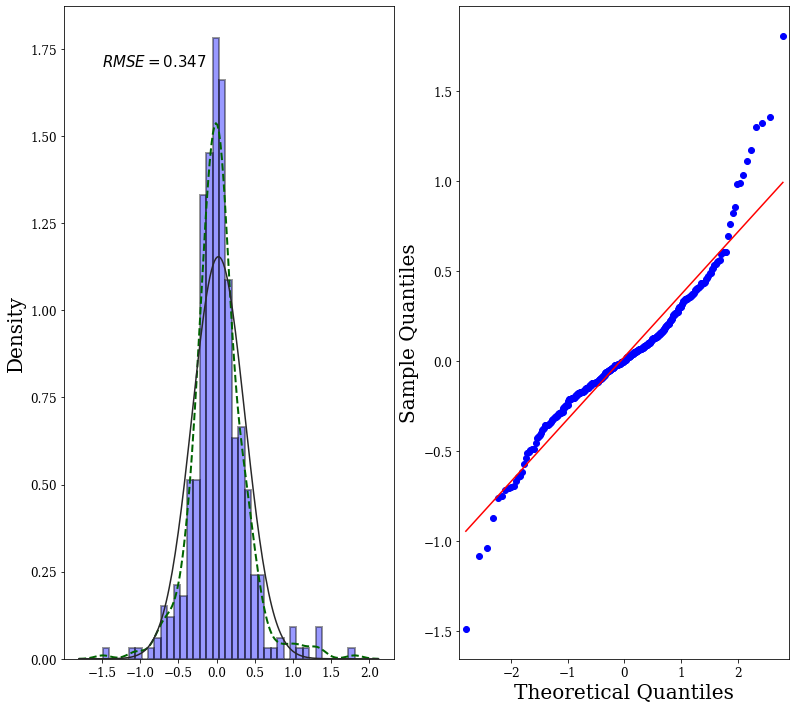

In [144]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13, 12))
sns.distplot(residuals_lgbm , fit=norm,
             hist_kws=dict(edgecolor="black",linewidth=2,
                           color='blue'), 
             kde_kws={'linestyle':'--','linewidth':2, 
                      "color": "darkgreen",
                      "label": "KDE"},ax=ax1)
ax1.text(-1.5,1.7,
        r'$RMSE = {:.3f}$'.format(np.sqrt(mse(test_df3['yield_actual'],
                                     test_df3["yield_predicted"]))),
        fontsize=15)
#ax.grid(True, linestyle='--')
ax.set_title('{} residuals'.format('LGBM'))

sm.ProbPlot(residuals_lgbm).qqplot(line='s', ax=ax2)
#sns.histplot(residuals_lgbm, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
# sns.histplot(residuals_lgbm,kde=True)
# x.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

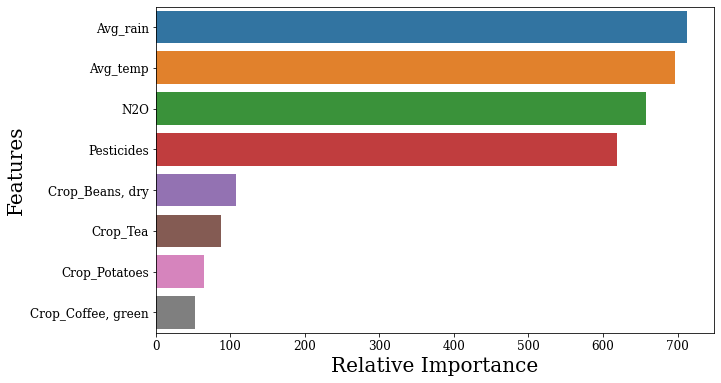

In [145]:
varimp_lgbm = {'Relative Importance':lgbm_model.feature_importances_,
          'Features':df_yield_dummy.columns[df_yield_dummy.columns != "Yield"]}

# #a4_dims = (8.27,16.7)
# a4_dims = (16.7, 8.27)

# fig, ax = plt.subplots(figsize=a4_dims)
# df=pd.DataFrame.from_dict(varimp_lgbm)
# df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
# df=df.dropna()

# sns.barplot(x="Relative Importance",y="Features",palette="vlag",data=df,orient="h",ax=ax);
# sns.color_palette("tab10")

# a4_dims = (10,6)
# al =9

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp_lgbm)
df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
df=df.dropna()
df=df.nlargest(al, 'Relative Importance')
sns.barplot(x="Relative Importance",y="Features",data=df,orient="h",ax=ax);
plt.show()

## SVM

In [146]:
svm1 = SVR()
#svm1 = best_svm
#rclf = best_c
svr_model = svm1.fit(train_X,train_Y)
test_df4 = test_df
test_df4["yield_predicted"] = svr_model.predict(test_X)
test_df4["yield_actual"] = pd.DataFrame(test_Y)["Yield_log"].tolist()
residuals_svm =test_df4["yield_actual"] -test_df4["yield_predicted"]

test_group = test_df4.groupby("Crop")
test_group.apply(lambda x : r2_score(x.yield_actual, x.yield_predicted))


Crop
Beans, dry      0.420
Coffee, green   0.617
Potatoes        0.428
Tea             0.256
dtype: float64

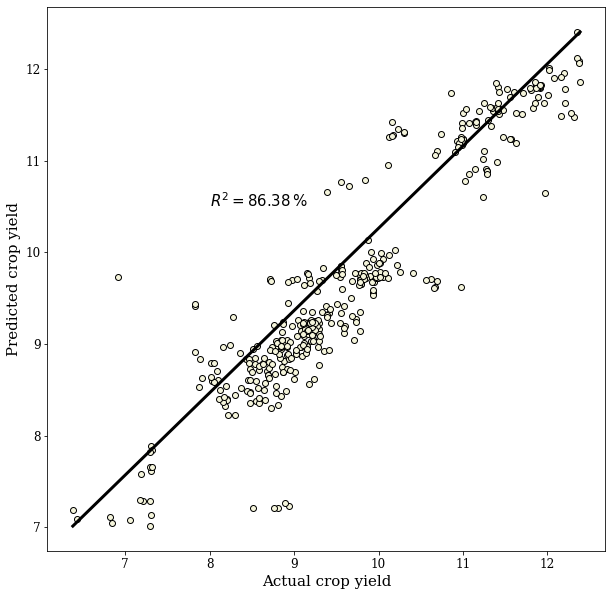

In [147]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots( figsize=[10,10])




ax.scatter(test_df4['yield_actual'], test_df4["yield_predicted"],c='beige',
          edgecolors=(0,0,0))
ax.plot([test_df4['yield_actual'].min(),test_df4['yield_actual'].max()],
        [test_df4["yield_predicted"].min(),test_df4["yield_predicted"].max()], c='k',lw=3)





#ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

ax.set_xlabel('Actual crop yield',fontsize=15)
ax.set_ylabel('Predicted crop yield',fontsize=15)
#ax.set_title("Crop yield prediction using Support Vector Machine")
# ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df4['yield_actual'],
#                                                          test_df4["yield_predicted"])[0,1]**2*100), fontsize=13)

ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df4['yield_actual'],
                                                       test_df4["yield_predicted"])*100),fontsize=15)
# leg = plt.legend(loc= 'best')

# # Hide the right and top spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Only show ticks on the left and bottom spines
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')



# plt.xlim([6.5, 12.5])
# plt.ylim([6.5, 12.5])

# plt.savefig('./Fig3/SVR_PT1.jpeg', bbox_inches='tight')
plt.savefig('./Fig6/SVR_PT1_2.jpeg', bbox_inches='tight')




#r2svr = r2_score(test_df4["yield_actual"],test_df4["yield_predicted"])
#plt.text(7,12,'$R^2$ = {}'.format(r2svr))
plt.show()

In [148]:
# # So let's run the model actual values against the predicted ones 

# fig, ax = plt.subplots( figsize=[10,10])

# sns.regplot(test_df4['yield_actual'], test_df4["yield_predicted"],data=test_df4,
#             scatter_kws={"color": "black"}, line_kws={"color": "red", 'label':'line of best fit'})

# ax.plot(test_df4['yield_actual'], test_df4['yield_actual']+0, ':b',
#        label='Identity line ($1:1$)')
    


# # ax.plot([test_df4['yield_actual'].min(),test_df4['yield_actual'].max()],
# #         [test_df4['yield_actual'].min(),test_df4['yield_actual'].max()+0], '--g',label='theoretical line of best fit')

# # ax.plot([test_df4['yield_actual'].min(),test_df4['yield_actual'].max()],
# #          [test_df4["yield_predicted"].min(),test_df4["yield_predicted"].max()],
# #          label='theoretical line', c='b',lw=3)



# # ax.scatter(test_df4['yield_actual'], test_df4["yield_predicted"],c='blue',
# #           edgecolors=(0,0,0))
# # ax.plot([test_df4['yield_actual'].min(),test_df4['yield_actual'].max()],
# #         [test_df4["yield_predicted"].min(),test_df4["yield_predicted"].max()], c='r',lw=3)

# #ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title("Crop yield prediction using Support Vector Machine")
# # ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df4['yield_actual'],
# #                                                          test_df4["yield_predicted"])[0,1]**2*100), fontsize=13)

# ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df4['yield_actual'],
#                                                        test_df4["yield_predicted"])*100),fontsize=15)
# leg = plt.legend(loc= 'best')

# # plt.savefig('./Fig3/SVR_PT1.jpeg', bbox_inches='tight')
# plt.savefig('./Fig5/SVR_PT1_5.jpeg', bbox_inches='tight')


# #r2svr = r2_score(test_df4["yield_actual"],test_df4["yield_predicted"])
# #plt.text(7,12,'$R^2$ = {}'.format(r2svr))
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


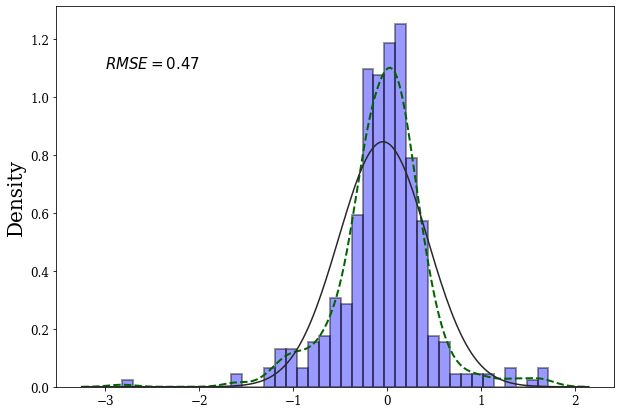

In [149]:
fig, ax1 = plt.subplots( figsize=(10,7))
sns.distplot(residuals_svm , fit=norm,
             hist_kws=dict(edgecolor="black",linewidth=2,
                           color='blue'), 
             kde_kws={'linestyle':'--','linewidth':2, 
                      "color": "darkgreen",
                      "label": "KDE"},ax=ax1)

# ax1.legend(['$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df4['yield_actual'],
#                                      test_df4["yield_predicted"])))],
#                 loc='best')


ax1.text(-3,1.1,r'$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df4['yield_actual'],
                                                      test_df4["yield_predicted"]))),fontsize=15)
#ax.grid(True, linestyle='--')
#ax1.set_title('{} residuals'.format('SVM '))

#sm.ProbPlot(residuals_svm).qqplot(line='s', ax=ax2)
#sns.histplot(residuals_lgbm, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
# sns.histplot(residuals_lgbm,kde=True)
# x.set(yticks=[], yticklabels=[], title="Residuals distribution")

#plt.savefig('./Fig3/residuals_svm.jpeg', bbox_inches='tight')
plt.savefig('./Fig5/residuals_svm_5.jpeg', bbox_inches='tight')
plt.show()

## Gradient Boosting Machine

In [150]:
#rclf?

In [151]:
clf = GradientBoostingRegressor()
#clf = best_gbm
gbm_model = clf.fit(train_X,train_Y)
test_df2 = test_df
test_df2["yield_predicted"] = gbm_model.predict(test_X)
test_df2["yield_actual"] = pd.DataFrame(test_Y)["Yield_log"].tolist()
residuals_gbm = test_df2["yield_actual"] -test_df2["yield_predicted"]

test_group = test_df2.groupby("Crop")
test_group.apply(lambda x : r2_score(x.yield_actual, x.yield_predicted))


Crop
Beans, dry      0.607
Coffee, green   0.680
Potatoes        0.677
Tea             0.386
dtype: float64

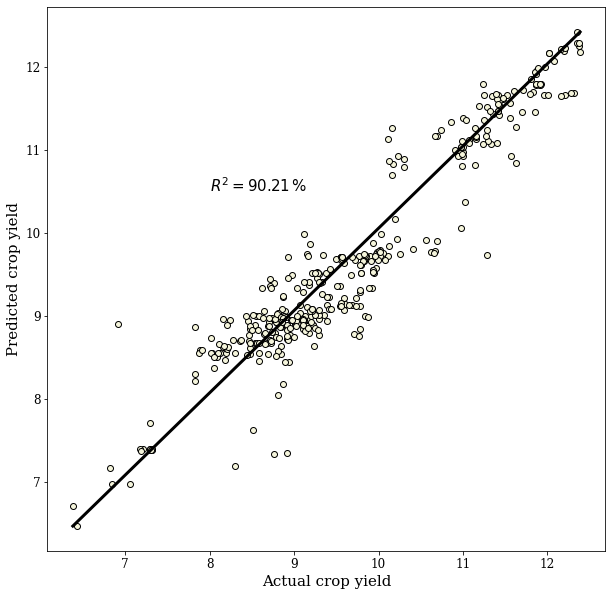

In [152]:
fig, ax = plt.subplots( figsize=[10,10])

#### when needed####

# sns.regplot(test_df2['yield_actual'], test_df2["yield_predicted"],data=test_df2,
#             scatter_kws={"color": "green"}, line_kws={"color": "red", 'label':'Line of best fit'})


    
# ax.plot(test_df2['yield_actual'], test_df2['yield_actual']+0,':b',
#        label='Identity line ($1:1$)' )
# # ax.plot([test_df2['yield_actual'].min(),test_df2['yield_actual'].max()],
# #          [test_df2["yield_predicted"].min(),test_df2["yield_predicted"].max()],
# #          label='theoretical line', c='b',lw=3)

#########################################


ax.scatter(test_df2['yield_actual'], test_df2["yield_predicted"],c='beige',
          edgecolors=(0,0,0))
ax.plot([test_df2['yield_actual'].min(),test_df2['yield_actual'].max()],
        [test_df2["yield_predicted"].min(),test_df2["yield_predicted"].max()], c='k',lw=3)

#ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

ax.set_xlabel('Actual crop yield',fontsize=15)
ax.set_ylabel('Predicted crop yield',fontsize=15)
#ax.set_title("Crop yield prediction using Gradient Boosting Machine")
ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df2['yield_actual'],
                                                       test_df2["yield_predicted"])*100), fontsize=15)

# ax.text(8,10,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df2['yield_actual'],
#                                                          test_df2["yield_predicted"])[0,1]**2*100), fontsize=13)
#leg = plt.legend(loc='best')

# plt.xlim([6.5, 12.5])
# plt.ylim([6.5, 12.5])

#r2svr = r2_score(test_df4["yield_actual"],test_df4["yield_predicted"])
#plt.text(7,12,'$R^2$ = {}'.format(r2svr))

# Hide the right and top spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Only show ticks on the left and bottom spines
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# plt.savefig('./Fig3/GBM_PT1.jpeg', bbox_inches='tight')
plt.savefig('./Fig6/GBM_PT1_2.jpeg', bbox_inches='tight')


plt.show()

In [153]:
# fig, ax = plt.subplots( figsize=[10,10])


# sns.regplot(test_df2['yield_actual'], test_df2["yield_predicted"],data=test_df2,
#             scatter_kws={"color": "black"}, line_kws={"color": "red", 'label':'Line of best fit'})


    
# ax.plot(test_df2['yield_actual'], test_df2['yield_actual']+0,':b',
#        label='Identity line ($1:1$)' )
# # ax.plot([test_df2['yield_actual'].min(),test_df2['yield_actual'].max()],
# #          [test_df2["yield_predicted"].min(),test_df2["yield_predicted"].max()],
# #          label='theoretical line', c='b',lw=3)




# # ax.scatter(test_df2['yield_actual'], test_df2["yield_predicted"],c='blue',
# #           edgecolors=(0,0,0))
# # ax.plot([test_df2['yield_actual'].min(),test_df2['yield_actual'].max()],
# #         [test_df2["yield_predicted"].min(),test_df2["yield_predicted"].max()], c='red',lw=3)

# #ax.errorbar(test_df1['yield_actual'], test_df1["yield_predicted"], fmt='')

# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title("Crop yield prediction using Gradient Boosting Machine")
# ax.text(8,10.5,r'$R^2 = {:.2f}\, \%$'.format(r2_score(test_df2['yield_actual'],
#                                                        test_df2["yield_predicted"])*100), fontsize=15)

# # ax.text(8,10,r'$R^2 = {:.2f}\, \%$'.format(np.corrcoef(test_df2['yield_actual'],
# #                                                          test_df2["yield_predicted"])[0,1]**2*100), fontsize=13)
# leg = plt.legend(loc='best')

# # plt.savefig('./Fig3/GBM_PT1.jpeg', bbox_inches='tight')
# plt.savefig('./Fig5/GBM_PT1_5.jpeg', bbox_inches='tight')

# #r2svr = r2_score(test_df4["yield_actual"],test_df4["yield_predicted"])
# #plt.text(7,12,'$R^2$ = {}'.format(r2svr))
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


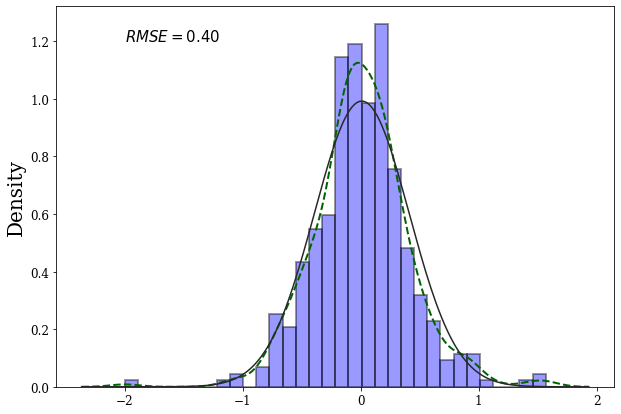

In [154]:
fig, ax1 = plt.subplots( figsize=(10,7))



sns.distplot(residuals_gbm , fit=norm, 
             hist_kws=dict(edgecolor="black",linewidth=2,
                           color='blue'),
             kde_kws={'linestyle':'--','linewidth':2, 
                      "color": "darkgreen",
                      "label": "KDE"},ax=ax1)


# ax1.legend(['$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df2['yield_actual'],
#                                      test_df2["yield_predicted"])))],
#                 loc='best')

ax1.text(-2,1.2,
        r'$RMSE = {:.2f}$'.format(np.sqrt(mse(test_df2['yield_actual'],
                                     test_df2["yield_predicted"]))),fontsize=15 )


#ax1.set_title('{} residuals'.format('GBM '))

#sm.ProbPlot(residuals_gbm).qqplot(line='s', ax=ax2)
#sns.histplot(residuals_lgbm, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
# sns.histplot(residuals_lgbm,kde=True)
# x.set(yticks=[], yticklabels=[], title="Residuals distribution")

#plt.savefig('./Fig3/residuals_gbm.jpeg', bbox_inches='tight')
plt.savefig('./Fig5/residuals_gbm_5.jpeg', bbox_inches='tight')

plt.show()

The figure above shows the goodness of the fit with the predictions visualized as a line. It can be seen that R Square score is excellent. This means that we have found a good fitting model to predict the crops yield value for a certain country. Adding more features, like climate data; wind and pollution, the economical situation of a given country and so on will probably enhance the model’s predictions.

In [155]:
#varimp = {'imp':model.feature_importances_,
         # 'names':df_yield_dummy.columns[df_yield_dummy.columns != "hg/ha_yield"]}

In [156]:
varimp_gbm = {'Relative Importance':gbm_model.feature_importances_,
          'Features':df_yield_dummy.columns[df_yield_dummy.columns != "Yield"]}

### feature imporetance in GMB

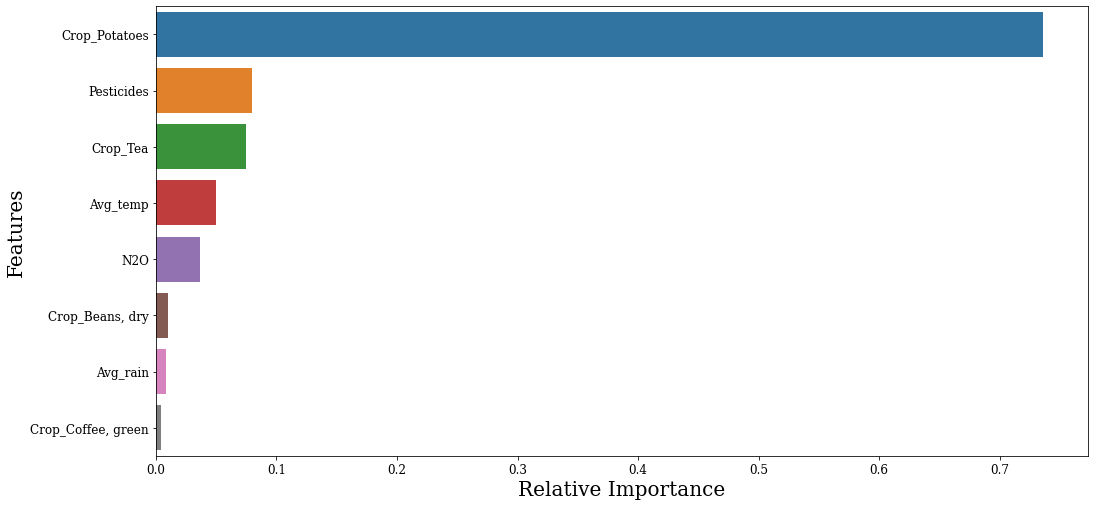

In [157]:
a4_dims = (16.7,8.27)

# fig, ax = plt.subplots(figsize=a4_dims)
# df=pd.DataFrame.from_dict(varimp_gmb)
# df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
# df=df.dropna()
# sns.barplot(x="Relative Importance",y="Features",palette="vlag",data=df,orient="h",ax=ax);
#df

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp_gbm)
df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
df=df.dropna()
df=df.nlargest(al, 'Relative Importance')
sns.barplot(x="Relative Importance",y="Features",data=df,orient="h",ax=ax);
plt.show()

In [158]:
# #7 most important factors that affect crops 
# #a4_dims = (16.7, 8.27)

# a4_dims = (10,6)
# al =9

# fig, ax = plt.subplots(figsize=a4_dims)
# df=pd.DataFrame.from_dict(varimp_gmb)
# df.sort_values(ascending=False,by=["Relative Importance"],inplace=True)
# df=df.dropna()
# df=df.nlargest(al, 'Relative Importance')
# sns.barplot(x="Relative Importance",y="Features",data=df,orient="h",ax=ax);
# plt.show()

https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4
    

https://medium.com/machine-learning-with-python/logistic-regression-implementation-in-python-74321fafa95c